# Chapter 8: Object-Oriented Programming for AI Applications

## Introduction

As artificial intelligence becomes increasingly integrated into diverse fields—from healthcare to finance to creative industries—professionals across domains find themselves needing to write code to integrate AI into their workflows. While many can write functional Python scripts (either through formal learning or with the help of generative AI tools) and use pre-built models, understanding Object-Oriented Programming (OOP) represents a crucial step toward building robust, maintainable, and scalable AI systems.

This chapter introduces Object-Oriented Programming concepts specifically tailored for practitioners who need to build AI applications in their domain. Rather than abstract computer science theory, we focus on practical applications: how OOP helps structure machine learning pipelines, manage multiple models, and build reusable AI components that can be easily maintained and extended.

The journey from writing simple Python scripts to building production AI systems often hits a wall when code becomes too complex to manage. The solution usually involved building systems piece by piece in a way that makes sense from a software engineering perspective, where components hook together cleanly and logically.

Object-Oriented Programming solves these problems by providing a framework to organize code into logical, reusable units. This organizational approach not only makes your code more maintainable but also enables you to build sophisticated AI systems incrementally, testing and refining each component independently before assembling them into a complete solution.



## 8.1 Understanding Objects in the Context of AI

### 8.1.1 Why Object-Oriented Programming Matters for AI

Imagine you're building a medical diagnosis assistant that uses AI to analyze patient symptoms. At first, your code might look straightforward: load a model, get input, make a prediction. But real-world requirements quickly add complexity. You need different models for different types of conditions—a model that specializes in cardiology, one for ENT (ear, nose, and throat), one for dermatology, and so on. You need to track which model made which diagnosis for audit purposes. You need to handle multiple patients simultaneously. You need to switch between GPT-5 for complex cases and a lighter model like Qwen for simple queries to manage costs.

Without proper organization, this code becomes what programmers call "spaghetti code"—everything is tangled together, and changing one part breaks three others. Object-Oriented Programming provides a solution by allowing us to think about our code the way we think about the real world: as interactions between distinct entities that have both properties and behaviors.

In the real world, an AI model has properties (its name, the medical domain it specializes in, its accuracy score, etc.) and behaviors (it can make predictions, it can analyze symptoms, it can generate reports). OOP lets us represent this natural structure in code by creating "objects" that bundle these properties and behaviors together.

Consider the difference between these two approaches to managing multiple AI models:

**Without OOP (Procedural Approach):**

You might have variables scattered throughout your code:
- `cardiology_model_name = "qwen-cardiology"`
- `cardiology_model_threshold = 0.8`
- `cardiology_predictions_count = 0`
- `ent_model_name = "gpt-ent"`
- `ent_model_threshold = 0.7`
- `ent_predictions_count = 0`

And functions that operate on these variables:
- `analyze_cardiology_symptoms()`
- `analyze_ent_symptoms()`
- `predict_with_cardiology(symptoms)`
- `predict_with_ent(symptoms)`

As you add more models, this quickly becomes unmanageable—there are more than 135 recognized medical specialties. Each new model requires new variables and new functions, and there's no clear relationship between related pieces.

**With OOP:**

You create a template (called a class) that defines what any medical AI model should have and do, then create individual models from that template. Each model keeps track of its own properties and knows how to perform its own behaviors. This mirrors how we naturally think about these systems.

### 8.1.2 Your First Class

A class is like a blueprint or a cookie cutter. It defines the shape and capabilities that objects created from it will have, but it's not an object itself. Just as a blueprint for a house isn't a house you can live in, a class for an AI model isn't a model you can use to make predictions—not until you create an actual object from it.

Let's start with the simplest possible class to understand the basic structure:

```python
class AIModel:
    def __init__(self, name):
        self.name = name
        self.predictions_made = 0
    
    def predict(self, symptoms):
        print(f"{self.name} analyzing symptoms...")
        self.predictions_made += 1
        print("Analysis complete!")
        return "diagnosis result"
```

Let's break down each part of this class:

**The class definition:** `class AIModel:` tells Python we're creating a new type of object called AIModel. By convention, class names use CamelCase (each word starts with a capital letter).

**The constructor:** The `__init__` method is special—it runs automatically when we create a new object from this class. Think of it as the setup instructions that run when a new AI model is born. The parameters it accepts become the information needed to create an object.

**The self parameter:** This is perhaps the most confusing part for newcomers. Every method in a class has `self` as its first parameter. This represents the specific object that's calling the method. When you have multiple AI models, `self` helps Python know which one you're talking about.

**Attributes:** Inside `__init__`, we create attributes by assigning values to `self.something`. These become the properties that each object remembers about itself. Here, each model remembers its name and how many predictions it has made.

**Methods:** The `predict` function is a method—a behavior that objects of this class can perform. Methods are just functions that belong to a class and can access the object's attributes through `self`.

Now let's create an actual object from this class:

```python
# Create an instance
model = AIModel("cardiology-analyzer")

# Check its attributes
print(f"Model name: {model.name}")
print(f"Predictions made: {model.predictions_made}")
```

When we write `AIModel("cardiology-analyzer")`, Python:
1. Creates a new empty object
2. Calls `__init__` with that object as `self` and "cardiology-analyzer" as `name`
3. The `__init__` method sets up the object's attributes
4. Returns the fully initialized object, which we store in the variable `model`

This `model` variable now holds an object—a specific instance of the AIModel class. It has its own name ("cardiology-analyzer") and its own prediction count (0). We can access these attributes using dot notation: `model.name` gets the name attribute of this specific model.

```python
# Call a method
result = model.predict("chest pain, shortness of breath")
print(f"Predictions made: {model.predictions_made}")
```

When we call `model.predict()`, Python automatically passes `model` as the `self` parameter to the predict method. Inside the method, `self.name` refers to this specific model's name, and `self.predictions_made += 1` increments this specific model's prediction count.

### 8.1.3 Adding More Functionality

Now that we understand the basic structure, let's create a more realistic class that actually does something useful. We'll build a simple medical triage classifier that demonstrates how objects can maintain state (remember things) and perform operations based on that state:

```python
class SimpleClassifier:
    def __init__(self, name, threshold=2):
        self.name = name
        self.threshold = threshold
        self.predictions_count = 0
        
        # Common medical symptoms to look for
        self.symptom_keywords = ["pain", "fever", "headache", "nausea", "cough", 
                                "fatigue", "dizzy", "bleeding", "swelling"]
    
    def predict(self, text):
        # Count how many symptoms are mentioned
        text_lower = text.lower()
        symptom_count = sum(1 for symptom in self.symptom_keywords if symptom in text_lower)
        
        self.predictions_count += 1
        
        # Classify based on number of symptoms
        if symptom_count >= self.threshold:
            return "complex_case"
        else:
            return "simple_case"
    
    def get_stats(self):
        return f"{self.name} has made {self.predictions_count} predictions"
```

This classifier demonstrates several important OOP concepts:

**Default parameters:** The `threshold=2` in `__init__` provides a default value. This means we can create a classifier without specifying a threshold, and it will use 2. This is common in AI where models often have sensible defaults that users can override when needed.

**State management:** The `predictions_count` attribute tracks how many predictions this specific classifier has made. Each time `predict` is called, it increments this counter. This is object state—information that persists between method calls.

**Encapsulation:** The predict method contains the logic for making predictions. Users of this class don't need to know how predictions are made (in this case, our simple symptom-counting logic). In a real AI system, this might involve complex preprocessing, model inference, and postprocessing, all hidden behind the simple `predict` interface.

Let's see this in action:

```python
# Create and use the classifier
classifier = SimpleClassifier("triage-assistant", threshold=2)

# Make some predictions
text1 = "Patient reports mild headache"
text2 = "Patient has severe pain, fever, and nausea"

print(f"Text 1: '{text1}' -> {classifier.predict(text1)}")
print(f"Text 2: '{text2}' -> {classifier.predict(text2)}")
```

Here we create a classifier with a threshold of 2 symptoms. The first text mentions only one symptom ("headache") and gets classified as a simple case, while the second mentions three symptoms ("pain", "fever", "nausea") and gets classified as a complex case.

```python
# Check statistics
print(classifier.get_stats())
```

After making two predictions, we can check the statistics. The classifier has been keeping track of how many predictions it made. This demonstrates how objects maintain their own state—the `predictions_count` belongs to this specific classifier object.

### 8.1.4 Objects Are Independent

One of the most important concepts to understand is that each object created from a class is independent. They share the same structure (defined by the class) but have their own separate data. This is like how two cars from the same model line share the same design but have different colors, mileage, and owners.

Let's demonstrate this independence:

```python
# Create two separate classifiers
emergency_triage = SimpleClassifier("emergency-triage", threshold=1)
hospital_admission = SimpleClassifier("hospital-admission", threshold=3)

# Use the emergency triage (flags cases with even 1 symptom)
emergency_triage.predict("Patient reports severe chest pain")
emergency_triage.predict("Patient has mild headache")
emergency_triage.predict("Patient experiencing dizziness and nausea")

# Use the routine screening (only flags cases with 3+ symptoms)
hospital_admission.predict("Patient reports occasional fatigue")

# Check their separate statistics
print(emergency_triage.get_stats())
print(hospital_admission.get_stats())
```

Even though both objects were created from the same SimpleClassifier class, they maintain completely separate states. The emergency triage has its own name, threshold, and prediction count, completely independent of the hospital admission. This is the power of OOP; we can create as many objects as we need, each maintaining its own state while sharing the same behaviors.

## 8.2 Working with Multiple Objects

### 8.2.3 Storing Objects in Collections

As your AI system grows, you'll often need to manage many objects together. Python's built-in data structures (lists, dictionaries, sets) work perfectly with objects. This is powerful because you can treat objects just like any other data type. So, you can store them, pass them around, and organize them however makes sense for your application.

Think of this like managing multiple diagnostic tools in a medical facility. You might have a list of different specialty analyzers, a dictionary mapping specialties to specific models, or a collection of models for different medical domains. Let's start with the simplest case - storing objects in a list:



In [27]:
class SpecialtyClassifier:
    def __init__(self, name, specialty_keywords, threshold=2):
        self.name = name
        self.specialty_keywords = specialty_keywords
        self.threshold = threshold
        self.predictions_count = 0
    
    def predict(self, text):
        # Count how many specialty-specific terms appear
        text_lower = text.lower()
        keyword_count = sum(1 for keyword in self.specialty_keywords if keyword in text_lower)
        
        self.predictions_count += 1
        
        # Classify based on number of specialty keywords found
        if keyword_count >= self.threshold:
            return "relevant_to_specialty"
        else:
            return "not_relevant"
    
    def get_stats(self):
        return f"{self.name} has made {self.predictions_count} predictions"



In [30]:
SpecialtyClassifier("cardiology",  ["chest pain", "palpitations", "heartbeat", "cardiac"], threshold=1)


In [31]:
# Create a list of specialty models
models = [
    SpecialtyClassifier("cardiology", 
                       ["chest pain", "palpitations", "heartbeat", "cardiac"],
                       threshold=1),
    SpecialtyClassifier("ent", 
                       ["ear pain", "hearing loss", "throat", "sinus", "tinnitus"],
                       threshold=1),
    SpecialtyClassifier("neurology",
                       ["headache", "dizzy", "seizure", "numbness", "tremor"],
                       threshold=1)
]


In [32]:
models

In [39]:
models[0].name

'cardiology'

In [34]:
models[0].predict("Patient reports severe headache and dizziness")

'not_relevant'

In [38]:
models[2].name

'neurology'

In [36]:
models[2].predict("Patient reports severe headache and dizziness")

'relevant_to_specialty'

In [40]:
test_case = "Patient reports severe headache and dizziness"

# Use all models
for model in models:
    result = model.predict(test_case)
    print(f"{model.name}: {result}")


cardiology: not_relevant
ent: not_relevant
neurology: relevant_to_specialty


This pattern is extremely common in AI applications. You might use it for ensemble predictions where you run multiple models and combine their outputs, for model comparison when testing different models on the same patient data, and for various other scenarios

### 8.2.4 Ensemble Predictions with Object Collections

One of the most powerful techniques in machine learning is ensemble learning - combining predictions from multiple models to get better results than any single model. In a true ensemble, multiple models all tackle the same classification task, and we combine (using for instnace averaging) their votes. Objects make this pattern natural and clean. Here we will change the definition of the severity classifier so that it takes the keywords that it needs to operate on. 

```python
class SeverityClassifier:
    def __init__(self, name, urgent_keywords, threshold=1):
        self.name = name
        self.urgent_keywords = urgent_keywords
        self.threshold = threshold
        self.predictions_count = 0
    
    def predict(self, text):
        # Count how many urgent keywords appear
        text_lower = text.lower()
        urgent_count = sum(1 for keyword in self.urgent_keywords if keyword in text_lower)
        
        self.predictions_count += 1
        
        # Classify based on urgency
        if urgent_count >= self.threshold:
            return "urgent"
        else:
            return "routine"
    
    def get_stats(self):
        return f"{self.name} has made {self.predictions_count} predictions"
```  


Notice that we modified the SeverityClassifier to accept urgent_keywords as a parameter during initialization rather than hard-coding them inside the class. This flexibility helps us create multiple classifier instances, each focusing on different aspects of urgency. One classifier might focus on pain-related keywords, another on vital signs, and yet another on symptom counts. By passing different keyword sets to each classifier, we can simulate different medical experts with different priorities, all evaluating the same patient case from their unique perspectives.

In [2]:
class SeverityClassifier:
    def __init__(self, name, urgent_keywords, threshold=1):
        self.name = name
        self.urgent_keywords = urgent_keywords
        self.threshold = threshold
        self.predictions_count = 0
    
    def predict(self, text):
        # Count how many urgent keywords appear
        text_lower = text.lower()
        urgent_count = sum(1 for keyword in self.urgent_keywords if keyword in text_lower)
        
        self.predictions_count += 1
        
        # Classify based on urgency
        if urgent_count >= self.threshold:
            return "urgent"
        else:
            return "routine"
    
    def get_stats(self):
        return f"{self.name} has made {self.predictions_count} predictions"

In [41]:
ensemble = [
    SeverityClassifier("pain-focused", 
                      ["severe pain", "acute pain", "unbearable", "excruciating"],
                      threshold=1),
    SeverityClassifier("vital-signs-focused", 
                      ["bleeding", "unconscious", "difficulty breathing", "chest pain"],
                      threshold=1),
    SeverityClassifier("symptom-count-focused",
                      ["fever", "vomiting", "dizzy", "weak", "pain", "bleeding"],
                      threshold=3)
]

In [18]:
ensemble[0].urgent_keywords

['severe pain', 'acute pain', 'unbearable', 'excruciating']

In [19]:
ensemble[0].threshold

1

In [20]:
ensemble[2].urgent_keywords

['fever', 'vomiting', 'dizzy', 'weak', 'pain', 'bleeding']

In [21]:
ensemble[2].threshold

3

In [22]:
test_case = "Severe pain with difficulty breathing and bleeding"
ensemble[0].predict(test_case)


'urgent'

In [23]:
test_case = "Severe pain with difficulty breathing and bleeding"
ensemble[1].predict(test_case)


'urgent'

In [24]:
test_case = "Severe pain with difficulty breathing and bleeding"
ensemble[2].predict(test_case)


'routine'

In [25]:
def ensemble_predict(models, text):
    """Get predictions from all models and vote"""
    predictions = [model.predict(text) for model in models]
    urgent_votes = predictions.count("urgent")
    
    if urgent_votes > len(models) / 2:
        return "urgent"
    else:
        return "routine"


print(f"Case: '{test_case}'")
print(f"Ensemble decision: {ensemble_predict(ensemble, test_case)}")
print("\nIndividual votes:")
print(f"  {ensemble[0].name}: {ensemble[0].predict(test_case)}")
print(f"  {ensemble[1].name}: {ensemble[1].predict(test_case)}")
print(f"  {ensemble[2].name}: {ensemble[2].predict(test_case)}")

Case: 'Severe pain with difficulty breathing and bleeding'
Ensemble decision: urgent

Individual votes:
  pain-focused: urgent
  vital-signs-focused: urgent
  symptom-count-focused: routine


This ensemble approach, when implemented reasonably, often produces more reliable results than any single model because different models might emphasize different aspects of the problem. By combining their votes, we get a more robust classification that's less likely to miss critical cases or over-flag routine cases.

Here is a trivial example, and the keywords were not rigorously picked. In real life, the approaches and the algorithms impose rigor that often lends more reliability to the problem. 

### 8.2.5 Using Dictionaries for Model Management

While lists are great for ordered collections, dictionaries are perfect when you need to look up specific models by name or purpose. This is especially useful in production systems where different models serve different medical specialties:



In [42]:
# Create a model registry using a dictionary
model_registry = {
    "cardiology": SpecialtyClassifier(
        "cardiology-analyzer",
        ["chest pain", "palpitations", "heartbeat", "cardiac", "angina", "arrhythmia"],
        threshold=1
    ),
    "ent": SpecialtyClassifier(
        "ent-analyzer",
        ["ear pain", "hearing loss", "throat", "sinus", "tinnitus", "vertigo", "nasal"],
        threshold=1
    ),
    "dermatology": SpecialtyClassifier(
        "dermatology-analyzer",
        ["rash", "itching", "skin", "lesion", "acne", "eczema", "hives"],
        threshold=1
    ),
    "neurology": SpecialtyClassifier(
        "neurology-analyzer",
        ["headache", "dizzy", "seizure", "numbness", "tremor", "migraine", "paralysis"],
        threshold=1
    )
}



In [45]:
model_registry['cardiology'].name

'cardiology-analyzer'

In [47]:
model_registry['cardiology'].predict("chest pain and irregular heartbeat")

'relevant_to_specialty'

In [57]:
# Function to classify by specialty
def classify_by_specialty(symptoms, specialty):
    if specialty in model_registry:
        model = model_registry[specialty]
        print(f"Testing ({symptoms}) in the context of **{specialty}**")
        return model.predict(symptoms)
    else:
        return f"No model available for {specialty}"

# Test with different specialties
print()
print(classify_by_specialty("chest pain and irregular heartbeat", "cardiology"))
print()
print(classify_by_specialty("ear pain and hearing loss", "ent"))
print()
print(classify_by_specialty("skin rash and itching", "neurology"))
print()
print(classify_by_specialty("broken bone", "orthopedics"))
print()


Testing (chest pain and irregular heartbeat) in the context of **cardiology**
relevant_to_specialty

Testing (ear pain and hearing loss) in the context of **ent**
relevant_to_specialty

Testing (skin rash and itching) in the context of **neurology**
not_relevant

No model available for orthopedics



In [ ]:
### 8.2.6 Objects Referring to Other Objects

Objects can store references to other objects as attributes, creating rich relationships between components. This is how complex AI systems are built - objects collaborating with other objects:

```python
class ModelWithPreprocessor:
    def __init__(self, name, classifier, preprocessor=None):
        self.name = name
        self.classifier = classifier  # Another object!
        self.preprocessor = preprocessor  # Could be another object
        
    def predict(self, text):
        # Preprocess if preprocessor exists
        if self.preprocessor:
            text = self.preprocessor(text)
        
        # Use the classifier object's predict method
        return self.classifier.predict(text)

# Create a preprocessing function (could be an object)
def normalize_symptoms(text):
    # Standardize common variations
    text = text.lower()
    text = text.replace("shortness of breath", "breathing difficulty")
    text = text.replace("stomach ache", "abdominal pain")
    return text

# Create a model that uses another model internally
base_classifier = SpecialtyClassifier(
    "cardiology-base",
    ["chest pain", "palpitations", "heartbeat", "cardiac", "breathing difficulty"],
    threshold=1
)
enhanced_model = ModelWithPreprocessor(
    "enhanced-cardiology",
    base_classifier,
    normalize_symptoms
)

# Test with different symptom descriptions
print(enhanced_model.predict("Patient has SHORTNESS OF BREATH and chest pain"))
print(enhanced_model.predict("Patient reports palpitations"))
```

In [ ]:
classDiagram
    direction LR
    
    class ModelWithPreprocessor {
        +string name
        +SpecialtyClassifier classifier
        +predict(text) string
    }
    
    class SpecialtyClassifier {
        +string name
        +list specialty_keywords
        +int threshold
        +int predictions_count
        +predict(text) string
        +get_stats() string
    }
    
    ModelWithPreprocessor o-- "1" SpecialtyClassifier : has-a

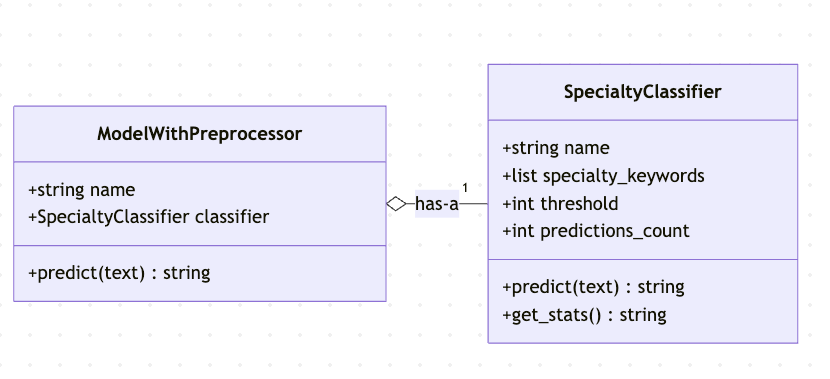

## 8.3 Encapsulation: Hiding Complexity and Protecting Data

### 8.3.1 What Is Encapsulation and Why Should You Care?

Imagine you're driving a car. You press the gas pedal to go faster and the brake to slow down. You don't need to understand how the engine combustion works, how the transmission shifts gears, or how the brake pads create friction. All that complexity is hidden under the hood. You interact with simple interfaces (pedals, steering wheel) while the complex machinery does its work invisibly.

This is encapsulation - one of the most important concepts in Object-Oriented Programming. Encapsulation means bundling data and methods together while hiding the internal details from the outside world. Users of your code interact with simple, clear interfaces without needing to understand or worry about the complex implementation details.

In AI applications, encapsulation is especially valuable because:

1. **AI models are complex**: A diagnostic system might involve symptom parsing, keyword matching, severity scoring, and classification logic (all of these terms will be covered in future lessons in ICS 601, ICS 603 or ICS 605). Users shouldn't need to understand all of this to use your model.

2. **Preventing mistakes**: If internal model parameters are freely accessible, someone might accidentally change them and break the model's functionality.

3. **Flexibility to change**: When implementation details are hidden, you can improve or completely rewrite the internals without affecting code that uses your class.

Let's explore how encapsulation works in Python and why it's essential for building robust AI systems.

### 8.3.2 Public vs Private: The Underscore Convention

Python doesn't enforce privacy the way some languages do (like Java or C++), but it has a strong convention that the community follows. In Python, we use underscores to indicate which parts of a class are meant to be internal (private) versus external (public).

Here's the convention:
- **No underscore**: Public attribute or method, meant to be used by external code
- **Single underscore (_)**: Internal attribute or method, shouldn't be accessed from outside
- **Double underscore (__)**: Name mangling occurs (Python changes the name to avoid conflicts)

Let's see this in practice with a diagnostic model:

```python
class DiagnosticModel:
    def __init__(self, name, api_key):
        self.name = name                    # Public - users can see this
        self._api_key = api_key             # Private - internal use only
        self._confidence_threshold = 0.7    # Private - internal configuration
        self.predictions_made = 0           # Public - users can track this
    
    def analyze(self, symptoms):
        """Public method - this is the interface users interact with"""
        # Uses private attributes internally
        self.predictions_made += 1
        return f"Analysis complete using {self.name}"
    
    def _validate_symptoms(self, symptoms):
        """Private method - internal helper, users don't call this"""
        return len(symptoms) > 0
```

The underscore in `_api_key` and `_validate_symptoms` is a signal to other programmers: "This is internal to the class. Don't access it directly." It's like a "Staff Only" sign on a door - not a locked door, but a clear message about intended use but 

```python
model = DiagnosticModel("cardiology-model", "secret-key-123")

# Access public attributes and methods - this is the intended interface
print(f"Model: {model.name}")
print(model.analyze("chest pain"))
print(f"Predictions: {model.predictions_made}")

# We COULD access private attributes, but we shouldn't
# print(model._api_key)  # This works but violates encapsulation!
```

You might wonder: "If Python doesn't actually prevent access to private attributes, what's the point?" The answer is about communication and maintainability. When you mark something as private, you're telling other developers (including future you) not to rely on it, you're free to change it later without worrying about breaking external code, and you're indicating what the intended interface is. This is sometimes called "privacy by convention" rather than "privacy by enforcement." It works well in practice because Python developers respect these conventions.

### 8.3.3 Why Encapsulation Matters

Encapsulation allows you to change how something works internally without affecting code that uses it. Consider this example:

```python
class SymptomAnalyzer:
    def __init__(self):
        self._urgent_keywords = ["severe", "acute", "emergency"]  # Private
        self.analyses_completed = 0                                # Public
    
    def analyze(self, text):
        """Public interface - simple to use"""
        is_urgent = self._check_urgency(text)  # Uses private method
        self.analyses_completed += 1
        return "urgent" if is_urgent else "routine"
    
    def _check_urgency(self, text):
        """Private method - can be changed without affecting users"""
        text_lower = text.lower()
        return any(keyword in text_lower for keyword in self._urgent_keywords)
```

Users of this class only interact with the `analyze()` method. They don't need to know about `_urgent_keywords` or `_check_urgency()`. This means you could completely change how urgency is detected - perhaps using a machine learning model instead of keywords - and existing code using this class wouldn't need any changes. The public interface stays the same, even though the implementation changes. This is the power of encapsulation.

### 8.3.4 Building Up Encapsulation: A Simple Example

Let's start with a basic diagnostic model and gradually add encapsulation to see why it matters:

```python
class SimpleDiagnostic:
    def __init__(self, specialty):
        self.specialty = specialty
        self.critical_symptoms = ["severe pain", "bleeding", "unconscious"]
        self.case_count = 0
    
    def assess(self, symptoms):
        self.case_count += 1
        has_critical = any(symptom in symptoms.lower() 
                          for symptom in self.critical_symptoms)
        return "critical" if has_critical else "stable"
```



In [58]:
class SimpleDiagnostic:
    def __init__(self, specialty):
        self.specialty = specialty
        self.critical_symptoms = ["severe pain", "bleeding", "unconscious"]
        self.case_count = 0
    
    def assess(self, symptoms):
        self.case_count += 1
        has_critical = any(symptom in symptoms.lower() 
                          for symptom in self.critical_symptoms)
        return "critical" if has_critical else "stable"


In [59]:
model = SimpleDiagnostic("emergency")
print(model.assess("Patient has severe pain"))


critical


In [ ]:
This works, but notice that `critical_symptoms` is public. Anyone could accidentally change it:

In [60]:
# Oops! Someone accidentally modified the critical symptoms
model.critical_symptoms = []
print(model.assess("Patient has severe pain"))  # Now incorrectly says "stable"!


stable


In [ ]:

Let's fix it with encapsulation:


In [ ]:
class SafeDiagnostic:
    def __init__(self, specialty):
        self.specialty = specialty
        self._critical_symptoms = ["severe pain", "bleeding", "unconscious"]  # Private
        self.case_count = 0
    
    def assess(self, symptoms):
        self.case_count += 1
        has_critical = any(symptom in symptoms.lower() 
                          for symptom in self._critical_symptoms)
        return "critical" if has_critical else "stable"

Now the critical symptoms are protected:
        

In [ ]:
model = SafeDiagnostic("emergency")
print(model.assess("Patient has severe pain"))  # "critical"

# The underscore signals: don't modify this
# model._critical_symptoms = []  # We could, but we know we shouldn't


Unlike languages like Java or C++ that enforce access control, Python's underscore conventions for protected and private members are just that—conventions—meaning you can still access and modify them, though doing so risks breaking the code.

### 8.3.5 Using Properties for Controlled Access

Sometimes you want to expose information but control how it's accessed. The `@property` decorator lets you create methods that look like attributes:

```python
class PatientMonitor:
    def __init__(self, patient_id):
        self.patient_id = patient_id
        self._vital_signs = []  # Private list
    
    def record_vitals(self, heart_rate, blood_pressure):
        self._vital_signs.append({
            "heart_rate": heart_rate,
            "blood_pressure": blood_pressure
        })
    
    @property
    def vital_count(self):
        """Users can read the count, but can't modify the internal list"""
        return len(self._vital_signs)
    
    @property
    def latest_vitals(self):
        """Return the most recent reading safely"""
        if self._vital_signs:
            return self._vital_signs[-1].copy()  # Return a copy, not the original
        return None
```

Let's see how this protects our data:

```python
monitor = PatientMonitor("P-12345")
monitor.record_vitals(72, "120/80")
monitor.record_vitals(75, "125/82")

# We can read information safely
print(f"Recorded {monitor.vital_count} readings")
print(f"Latest: {monitor.latest_vitals}")

# We can't accidentally break things
# monitor.vital_count = 0  # This would cause an error - properties are read-only
```





### 8.3.6 A Complete Example: Triage System

Let's build a complete triage system that demonstrates all these encapsulation principles:

```python
class TriageSystem:
    def __init__(self, facility_name):
        self.facility_name = facility_name
        # Private: internal configuration
        self._priority_keywords = {
            "critical": ["severe pain", "bleeding", "unconscious", "chest pain"],
            "urgent": ["moderate pain", "fever", "dizzy"],
            "routine": ["mild", "checkup"]
        }
        # Private: internal tracking
        self._assessments_log = []
        # Public: users can see this
        self.total_assessments = 0
    
    def triage(self, patient_symptoms):
        """Public interface - simple to use"""
        priority = self._determine_priority(patient_symptoms)
        self._log_assessment(patient_symptoms, priority)
        self.total_assessments += 1
        return priority
    
    def _determine_priority(self, symptoms):
        """Private: complex logic hidden from users"""
        symptoms_lower = symptoms.lower()
        
        for priority, keywords in self._priority_keywords.items():
            if any(keyword in symptoms_lower for keyword in keywords):
                return priority
        
        return "routine"
    
    def _log_assessment(self, symptoms, priority):
        """Private: internal record keeping"""
        self._assessments_log.append({
            "symptoms": symptoms[:50],  # Store first 50 chars only
            "priority": priority
        })
    
    @property
    def assessment_summary(self):
        """Public property: safe summary of assessments"""
        priorities = [log["priority"] for log in self._assessments_log]
        return {
            "total": len(priorities),
            "critical": priorities.count("critical"),
            "urgent": priorities.count("urgent"),
            "routine": priorities.count("routine")
        }
```

Now let's use this triage system:

```python
triage = TriageSystem("County General Hospital")

# Simple public interface
print(triage.triage("Patient reports severe pain and bleeding"))
print(triage.triage("Patient has mild headache"))
print(triage.triage("Patient experiencing moderate pain and fever"))
```

We can safely check the summary without worrying about breaking anything:

```python
print(f"\nAssessments at {triage.facility_name}:")
summary = triage.assessment_summary
for priority, count in summary.items():
    print(f"  {priority}: {count}")
```

The internal `_priority_keywords` and `_assessments_log` are protected, but we can still access the information we need through the public interface and properties.

### 8.3.7 Why This Matters

Encapsulation creates a clear contract between your class and its users. The public methods and properties are the interface - they're stable and documented. The private attributes and methods are the implementation - they can change without affecting anyone else's code.

This separation becomes critical as your AI systems grow. Imagine you want to upgrade the triage system to use machine learning instead of keyword matching. With proper encapsulation, you only need to change the private `_determine_priority()` method. All code using the `triage()` method continues to work without any changes.

Remember these key principles:

1. Start with attributes and methods private (with underscore)
2. Make things public only when users truly need to interact with them
3. Use `@property` when you want to expose data in a controlled way
4. Keep your public interface simple and stable
5. Hide complex implementation details behind private methods

Encapsulation isn't about making things difficult to access - it's about creating clean, maintainable code where changes to implementation don't break existing users of your code. This is essential for building production AI systems that can evolve over time.


## 8.4 Methods That Modify State

### 8.4.1 Understanding State: What Objects Remember

Before we dive into methods that modify state, let's understand what "state" means. The state of an object is simply what it currently remembers—the values of all its attributes at any given moment. Think of state like your own personal condition right now. Are you hungry or full? Happy or sad? Energetic or tired? These conditions can change over time based on what happens to you. When you eat, your state changes from hungry to full. When you exercise, your energy state might temporarily decrease but your mood might improve.

Objects in programming work the same way. An AI model starts in one state—perhaps untrained, with no predictions made, and default parameters. As we use the model, its state evolves. It becomes trained, accumulates a history of predictions, and its parameters get fine-tuned. This ability to remember and change is what makes objects powerful.

Consider the difference between a simple calculator function and a scientific calculator object. A function that adds two numbers forgets everything the moment it returns the result. But a scientific calculator object might remember the last result, maintain a history of calculations, and store user preferences. This memory—this state—enables more sophisticated behavior.

In AI applications, state becomes even more critical. A language model needs to remember conversation context to provide coherent responses. A recommendation system must track user preferences over time. A training pipeline needs to maintain metrics across epochs to visualize learning curves. Without state, these systems couldn't learn, adapt, or improve.

State is what transforms a collection of functions into an intelligent system. It provides context, enables learning, and allows objects to exhibit behavior that changes based on their history and experience. As we'll see in this section, managing state properly is one of the most important skills in building robust AI applications.

### 8.4.2 Methods That Change vs Methods That Don't

Not all methods are created equal when it comes to state. Some methods simply report information without changing anything, like checking your bank balance. Others actively modify state, like making a withdrawal. Understanding this distinction is crucial for writing clear, predictable code.

Methods that don't modify state are often called "pure" methods or "query" methods. They're like asking questions—you get an answer, but nothing changes. These methods are safe to call multiple times without worry. You could check your bank balance a hundred times in a row, and it wouldn't affect your account.

On the other hand, methods that modify state are like actions that have consequences. When you call these methods, something changes in the object, and that change persists. These are sometimes called "mutating" methods or "command" methods. Calling them multiple times will have different effects—withdrawing $100 twice means you're out $200, not $100.

Let's see this distinction in practice with a simple counter that might track prediction requests to an AI model:

```python
class SimpleCounter:
    def __init__(self):
        self.count = 0
    
    def get_count(self):
        # This method READS state but doesn't change it
        return self.count
    
    def is_positive(self):
        # Another read-only method
        return self.count > 0
    
    def increment(self):
        # This method MODIFIES state
        self.count += 1
    
    def reset(self):
        # This also MODIFIES state
        self.count = 0
```

Now let's observe how these different types of methods behave:

```python
counter = SimpleCounter()

# Read-only methods don't change state
print(f"Initial count: {counter.get_count()}")
print(f"Is positive? {counter.is_positive()}")
print(f"Count still: {counter.get_count()}")  # Unchanged

# Mutating methods do change state
counter.increment()
print(f"After increment: {counter.get_count()}")
counter.increment()
counter.increment()
print(f"After 3 increments: {counter.get_count()}")
print(f"Is positive now? {counter.is_positive()}")

counter.reset()
print(f"After reset: {counter.get_count()}")
```

Notice how calling `get_count()` multiple times always returns the same value until we call a mutating method like `increment()` or `reset()`. This distinction helps us reason about our code. When debugging, we know that query methods are safe to call for inspection, while command methods might change the system's behavior.

Good naming conventions help distinguish these method types. Methods starting with "get", "is", "has", or "calculate" typically don't modify state. Action verbs like "set", "update", "add", "remove", "train", or "reset" usually indicate state modification. Following these conventions makes your code more intuitive and reduces surprises.

### 8.4.3 Building a Training History

Now let's create something more realistic for AI applications—a model that remembers its training history. This demonstrates how state accumulates over time to provide valuable insights. In real machine learning workflows, tracking training history is essential for understanding model performance, debugging issues, and making decisions about when to stop training.

The power of stateful objects becomes clear when we need to track complex information over time. Unlike a simple function that would need to pass around training history as parameters, an object naturally maintains this information as part of its identity:

```python
class TrainableModel:
    def __init__(self, name):
        self.name = name
        self.epochs_trained = 0
        self.history = []  # Will store training records
        self.current_accuracy = 0.5  # Start at 50% accuracy
    
    def train_epoch(self, data_size):
        """Train for one epoch and record the results"""
        # Increment epoch counter
        self.epochs_trained += 1
        
        # Simulate accuracy improvement (with diminishing returns)
        improvement = 0.1 * (1 / self.epochs_trained)
        self.current_accuracy = min(self.current_accuracy + improvement, 0.95)
        
        # Create a record of this training session
        record = {
            'epoch': self.epochs_trained,
            'accuracy': self.current_accuracy,
            'samples': data_size
        }
        
        # Add record to history (modifying state)
        self.history.append(record)
        
        return self.current_accuracy
    
    def get_summary(self):
        """Read-only method to get training summary"""
        if not self.history:
            return f"{self.name}: No training performed yet"
        
        latest = self.history[-1]
        best_accuracy = max(record['accuracy'] for record in self.history)
        total_samples = sum(record['samples'] for record in self.history)
        
        return (f"{self.name} Training Summary:\n"
                f"  Epochs trained: {self.epochs_trained}\n"
                f"  Current accuracy: {latest['accuracy']:.2%}\n"
                f"  Best accuracy: {best_accuracy:.2%}\n"
                f"  Total samples seen: {total_samples:,}")
```

```python
model = TrainableModel("sentiment-analyzer")

# Initial state
print(model.get_summary())
print()

# Train for several epochs with different data sizes
print("Training progress:")
for i in range(5):
    data_size = 1000 * (i + 1)  # Increasing data sizes
    accuracy = model.train_epoch(data_size)
    print(f"  Epoch {i+1}: {data_size:,} samples -> {accuracy:.2%} accuracy")
```

```python
# The model's state has accumulated history
print("\n" + model.get_summary())
```

```python
# We can analyze the history
print("\nDetailed history:")
for record in model.history:
    print(f"  Epoch {record['epoch']}: "
          f"{record['accuracy']:.2%} accuracy on "
          f"{record['samples']:,} samples")
```

The beauty of this approach is that the model itself maintains its complete training story. Each call to `train_epoch` doesn't just perform an action and forget about it—it adds to the model's history, creating a rich record we can analyze later. This is how real machine learning frameworks like TensorFlow and PyTorch work, maintaining detailed training histories that can be visualized in tools like TensorBoard.

Notice how the `train_epoch` method modifies multiple aspects of state simultaneously. It increments the epoch counter, updates the current accuracy, and adds a new record to the history list. This coordinated state change ensures consistency—we never have an epoch count that doesn't match the length of our history, for example.

### 8.4.4 State Validation: Keeping Objects Consistent

When methods modify state, maintaining consistency becomes crucial. An object should never exist in an invalid or contradictory state. This is especially important in AI systems where an improperly configured model could produce misleading results or waste computational resources.

Think of state validation like the safety checks in a car. You can't shift into reverse while driving forward at high speed—the transmission system prevents this dangerous state. Similarly, you shouldn't be able to deploy an untrained model to production or start training without data. Let's build a class that carefully manages its state transitions to prevent such issues:

```python
class ModelLifecycle:
    def __init__(self, name):
        self.name = name
        self.status = "created"  # Possible: created, loaded, trained, deployed
        self.model_data = None
        self.accuracy = None
        self.deployment_url = None
        self.errors = []
    
    def load_data(self, data_path):
        """Load training data - only valid when created or after training"""
        if self.status not in ["created", "trained"]:
            error = f"Cannot load data when status is {self.status}"
            self.errors.append(error)
            return error
        
        # Simulate loading data
        self.model_data = f"Data from {data_path}"
        self.status = "loaded"
        return f"Successfully loaded data from {data_path}"
    
    def train(self):
        """Train the model - only valid when data is loaded"""
        if self.status != "loaded":
            error = f"Cannot train: status is {self.status}, need 'loaded'"
            self.errors.append(error)
            return error
        
        # Simulate training
        self.accuracy = 0.85
        self.status = "trained"
        return f"Training complete! Accuracy: {self.accuracy:.2%}"
    
    def deploy(self, url):
        """Deploy the model - only valid after training"""
        if self.status != "trained":
            error = f"Cannot deploy: model must be trained first (status: {self.status})"
            self.errors.append(error)
            return error
        
        self.deployment_url = url
        self.status = "deployed"
        return f"Model deployed to {url}"
    
    def get_info(self):
        """Read-only method to check current state"""
        info = {
            "name": self.name,
            "status": self.status,
            "accuracy": f"{self.accuracy:.2%}" if self.accuracy else "Not trained",
            "deployed_to": self.deployment_url or "Not deployed",
            "error_count": len(self.errors)
        }
        return info
```

```python
# Create a model and follow the correct lifecycle
model = ModelLifecycle("recommendation-engine")

print("Initial state:", model.get_info())
print()

# Try to train without loading data first (invalid transition)
print(model.train())
print()

# Follow the correct sequence
print(model.load_data("/path/to/data.csv"))
print(model.train())
print(model.deploy("https://api.mycompany.com/model"))
print()

print("Final state:", model.get_info())
```

```python
# Create another model and try to skip steps
model2 = ModelLifecycle("broken-model")

# Try to deploy without training (invalid)
print(model2.deploy("https://api.example.com"))

# Check errors
print(f"\nErrors encountered: {len(model2.errors)}")
for error in model2.errors:
    print(f"  - {error}")
```

This example shows how methods can enforce valid state transitions. The model must follow a specific lifecycle: created → loaded → trained → deployed. Each method checks the current state before making changes, preventing invalid operations.

### 8.4.5 Accumulating Complex State: Building an AI Experiment Tracker

Let's build something more sophisticated that shows how state can accumulate complex information over time. This experiment tracker might be used to compare different AI models:

```python
class ExperimentTracker:
    def __init__(self, experiment_name):
        self.experiment_name = experiment_name
        self.models = {}  # Dictionary to store model results
        self.best_model = None
        self.best_score = 0
        self.comparisons_made = 0
        self.start_time = "2024-01-01 10:00:00"  # Simplified timestamp
        
    def add_model_result(self, model_name, accuracy, training_time, params):
        """Add results from testing a model"""
        # Store comprehensive information about each model
        self.models[model_name] = {
            'accuracy': accuracy,
            'training_time': training_time,
            'parameters': params,
            'rank': None  # Will be set when we compare
        }
        
        # Update best model if this one is better
        if accuracy > self.best_score:
            self.best_score = accuracy
            self.best_model = model_name
        
        return f"Added {model_name}: {accuracy:.2%} accuracy"
    
    def compare_models(self):
        """Compare all models and rank them"""
        if len(self.models) < 2:
            return "Need at least 2 models to compare"
        
        # Sort models by accuracy
        sorted_models = sorted(
            self.models.items(),
            key=lambda x: x[1]['accuracy'],
            reverse=True
        )
        
        # Assign ranks (modifying state)
        for rank, (name, data) in enumerate(sorted_models, 1):
            self.models[name]['rank'] = rank
        
        self.comparisons_made += 1
        
        # Create comparison summary
        summary = f"Comparison #{self.comparisons_made}:\n"
        for name, data in sorted_models:
            summary += (f"  Rank {data['rank']}: {name} "
                       f"({data['accuracy']:.2%} accuracy, "
                       f"{data['training_time']}min training)\n")
        
        return summary
    
    def get_recommendation(self):
        """Provide recommendation based on accumulated state"""
        if not self.models:
            return "No models tested yet"
        
        if self.best_model:
            best_data = self.models[self.best_model]
            
            # Analyze trade-offs
            fastest_model = min(self.models.items(), 
                              key=lambda x: x[1]['training_time'])
            
            recommendation = f"Recommendation for '{self.experiment_name}':\n"
            recommendation += f"  Best accuracy: {self.best_model} ({self.best_score:.2%})\n"
            
            if fastest_model[0] != self.best_model:
                time_diff = best_data['training_time'] - fastest_model[1]['training_time']
                acc_diff = self.best_score - fastest_model[1]['accuracy']
                
                recommendation += f"  Trade-off option: {fastest_model[0]}\n"
                recommendation += f"    - {time_diff}min faster training\n"
                recommendation += f"    - Only {acc_diff:.2%} less accurate\n"
            
            return recommendation
```

```python
# Create an experiment
experiment = ExperimentTracker("Customer Churn Prediction")

# Test different models
experiment.add_model_result(
    "logistic_regression",
    accuracy=0.78,
    training_time=5,
    params={"regularization": 0.1}
)

experiment.add_model_result(
    "random_forest",
    accuracy=0.85,
    training_time=25,
    params={"trees": 100, "depth": 10}
)

experiment.add_model_result(
    "neural_network",
    accuracy=0.87,
    training_time=60,
    params={"layers": 3, "neurons": 128}
)

experiment.add_model_result(
    "xgboost",
    accuracy=0.86,
    training_time=15,
    params={"boosting_rounds": 100}
)

print(f"Best model so far: {experiment.best_model} "
      f"({experiment.best_score:.2%})")
```

```python
# Compare all models
print(experiment.compare_models())
```

```python
# Get recommendation based on accumulated state
print(experiment.get_recommendation())
```

This experiment tracker demonstrates several important concepts:

1. **Complex state accumulation**: The tracker builds up a comprehensive picture over time
2. **Derived state**: The best model and rankings are calculated from the accumulated data
3. **State-based intelligence**: The recommendation method uses all accumulated state to provide insights
4. **Trade-off analysis**: By maintaining comprehensive state, we can analyze trade-offs between different options

### 8.4.6 Managing State Changes with History

Sometimes you need to track not just the current state, but how it changed over time. This is especially important in AI for debugging, auditing, and understanding model behavior:

```python
class AuditedModel:
    def __init__(self, name):
        self.name = name
        self.current_version = 1.0
        self.parameters = {"threshold": 0.5, "max_length": 100}
        self.change_history = []
        
    def _record_change(self, change_type, details):
        """Private method to record all changes"""
        record = {
            "timestamp": f"2024-01-01 {len(self.change_history):02d}:00:00",
            "type": change_type,
            "details": details,
            "version": self.current_version
        }
        self.change_history.append(record)
    
    def update_parameter(self, param_name, new_value):
        """Update a parameter and record the change"""
        if param_name not in self.parameters:
            return f"Parameter {param_name} does not exist"
        
        old_value = self.parameters[param_name]
        self.parameters[param_name] = new_value
        
        # Record this change
        self._record_change(
            "parameter_update",
            f"{param_name}: {old_value} → {new_value}"
        )
        
        return f"Updated {param_name} from {old_value} to {new_value}"
    
    def upgrade_version(self, new_version):
        """Upgrade model version"""
        old_version = self.current_version
        self.current_version = new_version
        
        self._record_change(
            "version_upgrade",
            f"v{old_version} → v{new_version}"
        )
        
        return f"Upgraded from v{old_version} to v{new_version}"
    
    def rollback_parameter(self, param_name):
        """Rollback a parameter to its previous value"""
        # Find the last change for this parameter
        for change in reversed(self.change_history):
            if (change["type"] == "parameter_update" and 
                param_name in change["details"]):
                # Extract old value from the details string
                old_value = change["details"].split(":")[1].split("→")[0].strip()
                
                # Try to convert back to the right type
                try:
                    old_value = type(self.parameters[param_name])(old_value)
                except:
                    pass
                
                self.parameters[param_name] = old_value
                
                self._record_change(
                    "rollback",
                    f"{param_name} rolled back to {old_value}"
                )
                
                return f"Rolled back {param_name} to {old_value}"
        
        return f"No previous value found for {param_name}"
    
    def get_audit_trail(self):
        """Get full audit trail of changes"""
        trail = f"Audit Trail for {self.name}:\n"
        trail += f"Current Version: v{self.current_version}\n"
        trail += f"Current Parameters: {self.parameters}\n"
        trail += f"\nChange History ({len(self.change_history)} changes):\n"
        
        for change in self.change_history:
            trail += (f"  [{change['timestamp']}] "
                     f"{change['type']}: {change['details']}\n")
        
        return trail
```

```python
# Create an audited model
model = AuditedModel("fraud-detector")

# Make some changes
print(model.update_parameter("threshold", 0.7))
print(model.update_parameter("max_length", 200))
print(model.upgrade_version(1.1))
print(model.update_parameter("threshold", 0.8))
print()

# Check current state
print(f"Current parameters: {model.parameters}")
```

```python
# Rollback a parameter
print(model.rollback_parameter("threshold"))
print(f"After rollback: {model.parameters}")
```

```python
# View complete audit trail
print(model.get_audit_trail())
```

### 8.4.7 Best Practices for State Management

As we've seen, managing state is powerful but requires care. Here are key principles to follow:

1. **Make state changes explicit**: Method names should clearly indicate when state will change (use verbs like "update", "add", "remove", "reset")

2. **Validate before changing**: Always check if a state change is valid before making it

3. **Maintain consistency**: Never leave an object in a partially updated or invalid state

4. **Consider immutability for some data**: Some state should never change after initialization

5. **Document side effects**: Make it clear in docstrings when methods modify state

6. **Provide ways to inspect state**: Include methods to safely view current state

Let's see these practices in a final example:

```python
class ProductionModel:
    """A model ready for production use with careful state management"""
    
    def __init__(self, name, immutable_id):
        # Immutable attributes (never change after creation)
        self._id = immutable_id  # Private and immutable
        self._created_at = "2024-01-01"
        
        # Mutable attributes (can change)
        self.name = name
        self.is_active = False
        self.prediction_count = 0
        self.last_prediction = None
        self.error_rate = 0.0
        
    @property
    def id(self):
        """Read-only access to immutable ID"""
        return self._id
    
    @property
    def created_at(self):
        """Read-only access to creation time"""
        return self._created_at
    
    def activate(self):
        """Explicitly activate the model for use"""
        if self.is_active:
            return "Model is already active"
        
        self.is_active = True
        return f"Model {self.name} (ID: {self.id}) activated"
    
    def deactivate(self):
        """Explicitly deactivate the model"""
        if not self.is_active:
            return "Model is already inactive"
        
        self.is_active = False
        return f"Model {self.name} deactivated"
    
    def make_prediction(self, input_data):
        """Make a prediction - modifies prediction count and last prediction"""
        if not self.is_active:
            return {"error": "Model is not active"}
        
        # Simulate prediction
        prediction = f"Predicted class for: {input_data[:20]}..."
        
        # Update state
        self.prediction_count += 1
        self.last_prediction = {
            "input": input_data[:50],
            "output": prediction,
            "number": self.prediction_count
        }
        
        return prediction
    
    def get_status(self):
        """Safe read-only view of current state"""
        return {
            "id": self.id,
            "name": self.name,
            "active": self.is_active,
            "predictions_made": self.prediction_count,
            "last_prediction": self.last_prediction,
            "created": self.created_at,
            "health": "good" if self.error_rate < 0.05 else "needs attention"
        }
```

```python
# Create and use a production model
model = ProductionModel("spam-detector-v2", "model-12345")

# Check immutable properties
print(f"Model ID: {model.id}")
print(f"Created: {model.created_at}")

# Try to make prediction before activation
print(model.make_prediction("Test message"))

# Activate and use
print(model.activate())
print(model.make_prediction("Is this spam?"))
print(model.make_prediction("Another message"))

# Check status
import json
print("\nModel Status:")
print(json.dumps(model.get_status(), indent=2))
```

Understanding how to properly manage state through methods is crucial for building reliable AI systems. State makes your objects intelligent and adaptive, but it must be managed carefully to avoid bugs and maintain consistency. As your AI applications grow more complex, these state management patterns become increasingly important for maintaining clean, reliable, and understandable code.

## 8.5 Class Methods and Alternative Constructors

### 8.5.1 The Need for Multiple Ways to Create Objects

So far, we've been creating objects using the standard constructor pattern: calling the class name with arguments that get passed to `__init__`. This works well when you have all the information ready in the right format. But what happens when your data comes from different sources or in different formats?

Imagine you're building an AI system that needs to process text data. Sometimes the text comes directly from user input. Other times it's stored in a file. Sometimes it's in a database, or arrives as a JSON response from an API, or needs to be extracted from a PDF. If your class only has one way to create objects through `__init__`, you'd need to write conversion code everywhere you create an object, leading to repetition and potential errors.

This is where class methods shine. They provide alternative ways to create objects, acting as multiple doors into the same room. Each door is designed for a specific situation, making your code cleaner and more intuitive. In the world of AI and data science, where data comes from countless sources and formats, this flexibility is invaluable.

### 8.5.2 Understanding Class Methods vs Instance Methods

Before we dive into creating alternative constructors, it's important to understand the distinction between instance methods and class methods. We've been working with instance methods throughout this chapter—methods that operate on a specific instance of a class. When you call `model.train()`, the `train` method operates on that particular model object.

Class methods, marked with the `@classmethod` decorator, are different. They belong to the class itself, not to any particular instance. Instead of receiving `self` as their first parameter (which refers to an instance), they receive `cls` as their first parameter (which refers to the class). This might seem abstract, so let's see it in action.

The power of class methods becomes clear when you realize they can create and return new instances of the class. They're like factory functions built into the class itself, each specialized for creating objects from different starting points.

```python
class DataProcessor:
    def __init__(self, data, source_type="direct"):
        """Standard constructor - expects data in a specific format"""
        self.data = data
        self.source_type = source_type
        self.processed = False
        self.created_at = "2024-01-01 12:00:00"
    
    @classmethod
    def from_file(cls, filename):
        """Alternative constructor - creates object from a file"""
        # In real code, this would actually read the file
        print(f"Reading data from {filename}...")
        data = f"Content from {filename}"
        # cls refers to the DataProcessor class
        # This creates and returns a new DataProcessor object
        return cls(data, source_type="file")
    
    @classmethod
    def from_list(cls, items):
        """Alternative constructor - creates object from a list"""
        print(f"Converting {len(items)} items to data...")
        data = ", ".join(str(item) for item in items)
        return cls(data, source_type="list")
    
    @classmethod
    def from_json(cls, json_string):
        """Alternative constructor - creates object from JSON"""
        import json
        print("Parsing JSON data...")
        parsed = json.loads(json_string)
        data = str(parsed)  # Simplified conversion
        return cls(data, source_type="json")
    
    def process(self):
        """Regular instance method - operates on the object's data"""
        self.processed = True
        return f"Processed {self.source_type} data: {self.data[:30]}..."
    
    def get_info(self):
        """Regular instance method - returns information about this instance"""
        return {
            "source": self.source_type,
            "processed": self.processed,
            "data_length": len(self.data),
            "created": self.created_at
        }
```

Now let's see how these different constructors make our code cleaner and more expressive:

```python
# Standard construction - when you have data ready
processor1 = DataProcessor("raw text data")

# From a file - the class method handles file reading
processor2 = DataProcessor.from_file("training_data.txt")

# From a list - the class method handles conversion
processor3 = DataProcessor.from_list([1, 2, 3, 4, 5])

# From JSON - the class method handles parsing
processor4 = DataProcessor.from_json('{"model": "gpt-4", "temperature": 0.7}')

# All objects are full DataProcessor instances
for p in [processor1, processor2, processor3, processor4]:
    print(p.get_info())
```

```python
# They all work the same way once created
print(processor1.process())
print(processor2.process())
print(processor3.process())
print(processor4.process())
```

Notice how each class method handles the specific details of its data source. The file method knows how to read files, the JSON method knows how to parse JSON, and so on. This keeps the conversion logic organized and reusable. Anyone using your class immediately knows the available options for creating objects just by looking at the class methods.

### 8.5.3 Real-World AI Application: Model Loaders

Let's see how this pattern is used in real AI applications. When working with machine learning models, you often need to load them from different sources. Sometimes you're loading a pre-trained model from Hugging Face, sometimes from a local file, sometimes you're creating a fresh model for training, and sometimes you're restoring from a checkpoint.

```python
class AIModel:
    def __init__(self, architecture, weights=None, metadata=None):
        """Base constructor - requires all components"""
        self.architecture = architecture
        self.weights = weights or {}
        self.metadata = metadata or {}
        self.training_history = []
        self.is_trained = weights is not None
    
    @classmethod
    def from_pretrained(cls, model_name):
        """Load a pre-trained model from a model hub"""
        print(f"Downloading {model_name} from model hub...")
        # Simulate downloading pre-trained model
        architecture = f"{model_name}_architecture"
        weights = {"layer1": [0.1, 0.2], "layer2": [0.3, 0.4]}  # Simplified
        metadata = {
            "source": "model_hub",
            "original_name": model_name,
            "downloaded_at": "2024-01-01"
        }
        return cls(architecture, weights, metadata)
    
    @classmethod
    def from_checkpoint(cls, checkpoint_path):
        """Restore model from a training checkpoint"""
        print(f"Loading checkpoint from {checkpoint_path}...")
        # Simulate loading from checkpoint
        architecture = "restored_architecture"
        weights = {"layer1": [0.5, 0.6], "layer2": [0.7, 0.8]}
        metadata = {
            "source": "checkpoint",
            "checkpoint_path": checkpoint_path,
            "training_epoch": 50
        }
        # Create model with checkpoint data
        model = cls(architecture, weights, metadata)
        # Restore training history too
        model.training_history = ["epoch_1", "epoch_2", "..."]
        return model
    
    @classmethod
    def create_for_training(cls, architecture, config):
        """Create a fresh model ready for training"""
        print(f"Initializing {architecture} for training...")
        # Initialize with random weights
        import random
        weights = None  # Will be initialized during first training
        metadata = {
            "source": "new",
            "config": config,
            "created_for": "training"
        }
        return cls(architecture, weights, metadata)
    
    def train(self, data):
        """Train the model"""
        if not self.is_trained:
            print("Initializing weights for first training...")
            self.weights = {"layer1": [0.0, 0.0], "layer2": [0.0, 0.0]}
        
        print(f"Training on {len(data)} samples...")
        # Simulate training
        self.training_history.append(f"Trained on {len(data)} samples")
        self.is_trained = True
        return "Training complete"
    
    def predict(self, input_data):
        """Make a prediction"""
        if not self.is_trained:
            return "Error: Model not trained"
        return f"Prediction for '{input_data}'"
    
    def get_summary(self):
        """Get model information"""
        return {
            "architecture": self.architecture,
            "is_trained": self.is_trained,
            "source": self.metadata.get("source", "unknown"),
            "history_length": len(self.training_history)
        }
```

Let's see how these different creation methods serve different use cases:

```python
# Use case 1: Using a pre-trained model for inference
bert_model = AIModel.from_pretrained("bert-base-uncased")
print("BERT model summary:", bert_model.get_summary())
print("Prediction:", bert_model.predict("Sample text"))
```

```python
# Use case 2: Resuming training from a checkpoint
resumed_model = AIModel.from_checkpoint("/models/checkpoint_epoch50.pt")
print("Resumed model summary:", resumed_model.get_summary())
resumed_model.train(["more", "training", "data"])
```

```python
# Use case 3: Starting fresh training
new_model = AIModel.create_for_training(
    "transformer", 
    config={"layers": 12, "heads": 8}
)
print("New model summary:", new_model.get_summary())
new_model.train(["training", "data"])
print("After training:", new_model.get_summary())
```

This pattern appears throughout popular AI frameworks. PyTorch models often have `from_pretrained()` methods. Scikit-learn estimators can be created from saved states. Transformers from Hugging Face extensively use this pattern to load models from different sources.

### 8.5.4 Factory Methods for Complex Object Creation

Sometimes creating an object requires complex setup logic that would make the `__init__` method unwieldy. Class methods can act as factory methods that handle this complexity, keeping the core constructor simple. This is especially useful in AI when you need to validate inputs, set up resources, or coordinate multiple components.

```python
class ExperimentPipeline:
    def __init__(self, name, components):
        """Simple constructor - expects components to be ready"""
        self.name = name
        self.components = components
        self.results = []
        
    @classmethod
    def create_nlp_pipeline(cls, name, model_size="base"):
        """Factory method for NLP pipelines"""
        print(f"Setting up NLP pipeline with {model_size} models...")
        
        # Complex setup logic for NLP components
        components = {}
        
        if model_size == "base":
            components["tokenizer"] = "BertTokenizer"
            components["embedder"] = "BertEmbeddings-base"
            components["classifier"] = "BertClassifier-base"
        elif model_size == "large":
            components["tokenizer"] = "RobertaTokenizer"
            components["embedder"] = "RobertaEmbeddings-large"
            components["classifier"] = "RobertaClassifier-large"
        else:
            raise ValueError(f"Unknown model size: {model_size}")
        
        # Add common NLP components
        components["preprocessor"] = "TextCleaner"
        components["postprocessor"] = "OutputFormatter"
        
        return cls(f"{name}_nlp", components)
    
    @classmethod
    def create_vision_pipeline(cls, name, task="classification"):
        """Factory method for computer vision pipelines"""
        print(f"Setting up vision pipeline for {task}...")
        
        components = {}
        
        if task == "classification":
            components["preprocessor"] = "ImageNormalizer"
            components["augmenter"] = "RandomAugmentation"
            components["model"] = "ResNet50"
            components["classifier"] = "SoftmaxClassifier"
        elif task == "detection":
            components["preprocessor"] = "ImageResizer"
            components["model"] = "YOLOv5"
            components["detector"] = "BoundingBoxDetector"
            components["tracker"] = "ObjectTracker"
        else:
            raise ValueError(f"Unknown task: {task}")
        
        return cls(f"{name}_vision", components)
    
    @classmethod
    def create_multimodal_pipeline(cls, name):
        """Factory method combining text and vision"""
        print("Setting up multimodal pipeline...")
        
        # Create subcomponents using other factory methods
        nlp_components = {
            "text_encoder": "BertEncoder",
            "text_processor": "TextProcessor"
        }
        
        vision_components = {
            "image_encoder": "ViTEncoder",
            "image_processor": "ImageProcessor"
        }
        
        fusion_components = {
            "cross_attention": "CrossModalAttention",
            "fusion_layer": "MultimodalFusion",
            "output_head": "MultimodalClassifier"
        }
        
        # Combine all components
        all_components = {
            **nlp_components,
            **vision_components,
            **fusion_components
        }
        
        return cls(f"{name}_multimodal", all_components)
    
    def run(self, data):
        """Run the pipeline on data"""
        print(f"Running {self.name} pipeline with {len(self.components)} components")
        result = f"Processed {data} through {list(self.components.keys())}"
        self.results.append(result)
        return result
    
    def get_info(self):
        """Get pipeline information"""
        return {
            "name": self.name,
            "num_components": len(self.components),
            "components": list(self.components.keys()),
            "runs_completed": len(self.results)
        }
```

```python
# Create specialized pipelines with complex setup
nlp_pipeline = ExperimentPipeline.create_nlp_pipeline("sentiment", model_size="base")
print("NLP Pipeline:", nlp_pipeline.get_info())

vision_pipeline = ExperimentPipeline.create_vision_pipeline("product", task="classification")
print("Vision Pipeline:", vision_pipeline.get_info())

multimodal = ExperimentPipeline.create_multimodal_pipeline("content_moderation")
print("Multimodal Pipeline:", multimodal.get_info())
```

Each factory method encapsulates the knowledge of how to create a specific type of pipeline. Users don't need to know which components go together or how to configure them—they just specify their intent (NLP with base models, vision for classification, etc.) and get a properly configured pipeline.

### 8.5.5 The Builder Pattern with Class Methods

Class methods can also implement the builder pattern, where you construct objects step by step. This is particularly useful when objects have many optional parameters or when construction involves multiple stages. In AI applications, this pattern is perfect for constructing complex models or experiments with many configuration options.

```python
class ModelBuilder:
    def __init__(self):
        """Initialize empty builder"""
        self.config = {}
        
    @classmethod
    def for_classification(cls, num_classes):
        """Start building a classification model"""
        builder = cls()
        builder.config["task"] = "classification"
        builder.config["output_size"] = num_classes
        builder.config["loss_function"] = "cross_entropy"
        return builder
    
    @classmethod
    def for_regression(cls):
        """Start building a regression model"""
        builder = cls()
        builder.config["task"] = "regression"
        builder.config["output_size"] = 1
        builder.config["loss_function"] = "mse"
        return builder
    
    def with_architecture(self, architecture):
        """Set the model architecture"""
        self.config["architecture"] = architecture
        return self  # Return self for method chaining
    
    def with_optimizer(self, optimizer, learning_rate):
        """Set the optimizer"""
        self.config["optimizer"] = optimizer
        self.config["learning_rate"] = learning_rate
        return self
    
    def with_regularization(self, l2_weight=0.01, dropout=0.5):
        """Add regularization"""
        self.config["l2_weight"] = l2_weight
        self.config["dropout"] = dropout
        return self
    
    def with_data_augmentation(self, augmentation_types):
        """Add data augmentation"""
        self.config["augmentation"] = augmentation_types
        return self
    
    def build(self):
        """Create the actual model with the configured settings"""
        # Validate configuration
        required = ["task", "architecture", "optimizer"]
        for field in required:
            if field not in self.config:
                raise ValueError(f"Missing required configuration: {field}")
        
        print(f"Building {self.config['task']} model...")
        print(f"Configuration: {self.config}")
        
        # In reality, this would create an actual model
        # For demonstration, we return the configuration
        return self.config
```

```python
# Build a classification model step by step
classification_model = (ModelBuilder
    .for_classification(num_classes=10)
    .with_architecture("resnet50")
    .with_optimizer("adam", learning_rate=0.001)
    .with_regularization(l2_weight=0.001, dropout=0.3)
    .with_data_augmentation(["rotation", "flip", "zoom"])
    .build())

print("Classification model built!")
```

```python
# Build a simpler regression model
regression_model = (ModelBuilder
    .for_regression()
    .with_architecture("simple_mlp")
    .with_optimizer("sgd", learning_rate=0.01)
    .build())

print("Regression model built!")
```

The beauty of this pattern is how readable and flexible it makes object construction. Each method clearly states what it's configuring, and you can easily skip optional configurations. The class methods `for_classification` and `for_regression` provide starting points that set sensible defaults for each type of task.

### 8.5.6 When to Use Class Methods

Class methods are powerful tools, but like any tool, they should be used appropriately. Here are guidelines for when class methods make sense in your AI applications.

Use class methods when you need alternative constructors that create objects from different data sources. If users of your class commonly need to create objects from files, databases, APIs, or other formats, provide class methods that handle these conversions. This keeps the conversion logic centralized and tested in one place.

Use them when construction requires complex setup or validation that would clutter the main constructor. If creating an object involves downloading files, setting up connections, or complex calculations, a class method can handle this while keeping `__init__` simple and focused.

Use them when you want to provide convenient factory methods for common configurations. If there are common ways to configure your objects (like "development mode" vs "production mode"), class methods can encapsulate these configurations.

However, don't overuse class methods. If you find yourself creating many class methods that do similar things, you might need to rethink your design. Sometimes a separate factory class or a configuration object might be more appropriate than numerous class methods.

Remember that class methods are inherited by subclasses, which can be both powerful and potentially confusing. A subclass inherits all class methods from its parent, and these methods will create instances of the subclass, not the parent class. This is usually what you want, but it's important to be aware of this behavior.

Class methods are part of what makes Python's object-oriented programming both flexible and expressive. They allow you to create rich APIs for your classes that guide users toward correct usage while hiding complexity. In the world of AI and machine learning, where data comes from diverse sources and models require complex initialization, class methods are an essential tool in your programming toolkit.

## 8.6 Inheritance: Building on Existing Classes

### 8.6.1 Understanding Inheritance Through Real-World Relationships

Inheritance is one of the most powerful features of object-oriented programming, yet it's also one of the most intuitive once you understand it through real-world analogies. Think about the relationship between animals and specific species. All mammals share certain characteristics: they're warm-blooded, they nurse their young, they have hair or fur. Dogs are mammals, so they automatically have all these mammalian traits, plus their own specific characteristics like barking and tail-wagging. Cats are also mammals, sharing the base mammalian traits but with their own unique behaviors like purring and climbing.

This is exactly how inheritance works in programming. You create a base class (like "Mammal") that defines common attributes and behaviors. Then you create specialized classes (like "Dog" and "Cat") that inherit from the base class. The specialized classes automatically get all the features of the base class, plus they can add their own unique features or modify inherited ones.

In the context of AI and machine learning, inheritance is incredibly useful. Consider all the different types of neural networks: convolutional neural networks for images, recurrent neural networks for sequences, transformers for language. They all share common features like having weights, being trainable, making predictions. Rather than rewriting this common functionality for each type, we can define it once in a base class and let specific network types inherit and extend it.

### 8.6.2 Your First Inheritance Hierarchy

Let's start with a simple example that demonstrates the mechanics of inheritance before we dive into AI-specific applications. We'll create a base class for a general AI model and then create specialized versions for different tasks.

```python
class BaseModel:
    def __init__(self, name, version="1.0"):
        """Base class for all AI models"""
        self.name = name
        self.version = version
        self.trained = False
        self.training_time = 0
        
    def info(self):
        """Method available to all models"""
        return f"{self.name} v{self.version} (Trained: {self.trained})"
    
    def train(self, data, epochs):
        """Basic training that all models share"""
        print(f"Training {self.name} for {epochs} epochs...")
        # Simulate training
        self.training_time += epochs * 10  # 10 seconds per epoch
        self.trained = True
        return f"Training complete in {self.training_time} seconds"
    
    def process(self, data):
        """This should be implemented by each specific model type"""
        raise NotImplementedError("Subclasses must implement process()")
```

This base class defines what all models have in common. Every model has a name, a version, and a training status. Every model can be trained and can provide information about itself. The `process` method is special—it's designed to be overridden by subclasses. By raising `NotImplementedError`, we're saying "all models must be able to process data, but each type will do it differently."

Now let's create specialized model types that inherit from this base:

```python
class TextModel(BaseModel):
    def __init__(self, name, language="en", max_length=512):
        # First, call the parent class constructor
        super().__init__(name)  
        # Then add attributes specific to text models
        self.language = language
        self.max_length = max_length
        self.vocabulary_size = 0
    
    def process(self, data):
        """Text-specific processing"""
        if not self.trained:
            return "Error: Model must be trained first"
        
        # Simulate text processing
        words = data.split()
        if len(words) > self.max_length:
            words = words[:self.max_length]
        
        return f"Processed {len(words)} words in {self.language}"
    
    def build_vocabulary(self, texts):
        """Method specific to text models"""
        unique_words = set()
        for text in texts:
            unique_words.update(text.split())
        self.vocabulary_size = len(unique_words)
        return f"Built vocabulary with {self.vocabulary_size} unique words"
```

```python
class ImageModel(BaseModel):
    def __init__(self, name, image_size=224, channels=3):
        super().__init__(name)
        # Image-specific attributes
        self.image_size = image_size
        self.channels = channels
        self.supported_formats = ["jpg", "png", "bmp"]
    
    def process(self, data):
        """Image-specific processing"""
        if not self.trained:
            return "Error: Model must be trained first"
        
        return f"Processed image at {self.image_size}x{self.image_size}x{self.channels}"
    
    def validate_image(self, image_path):
        """Method specific to image models"""
        extension = image_path.split('.')[-1].lower()
        if extension in self.supported_formats:
            return f"Valid {extension} image"
        else:
            return f"Unsupported format. Use: {self.supported_formats}"
```

Now let's see inheritance in action:

```python
# Create instances of our specialized models
text_model = TextModel("sentiment-analyzer", language="es")
image_model = ImageModel("face-detector", image_size=256)

# Both models inherited the info() method from BaseModel
print(text_model.info())
print(image_model.info())
```

```python
# Both models inherited the train() method
print(text_model.train(["training", "data"], epochs=5))
print(image_model.train(["image", "data"], epochs=3))

# Check their status after training
print(text_model.info())
print(image_model.info())
```

```python
# Each model implements process() differently
print(text_model.process("Este es un texto en español"))
print(image_model.process("photo.jpg"))
```

```python
# Each model also has its own unique methods
print(text_model.build_vocabulary(["hello world", "machine learning", "hello AI"]))
print(image_model.validate_image("document.pdf"))
print(image_model.validate_image("photo.jpg"))
```

Notice what happened here. Both `TextModel` and `ImageModel` automatically got the `info()` and `train()` methods from `BaseModel` without having to write them. This is the power of inheritance—you write common code once and reuse it across many classes. At the same time, each specialized class can add its own unique features and override inherited methods when needed.

### 8.6.3 Understanding the super() Function

The `super()` function is crucial for inheritance but often confuses beginners. Let's demystify it. When you see `super().__init__(name)` in a child class, it's saying "call my parent's constructor first, then do my own setup." This ensures that everything the parent class needs to set up gets done before the child class adds its own specializations.

Think of it like building a house. The base class constructs the foundation, walls, and roof—the essential structure every house needs. The child class then adds the specific features: a Victorian house adds ornate trim, a modern house adds floor-to-ceiling windows. You wouldn't start adding windows before the walls are up, which is why we call `super().__init__()` first.

Let's see a more detailed example that shows why `super()` is important:

```python
class NeuralNetwork:
    def __init__(self, name, input_size, output_size):
        print(f"  Base class: Initializing neural network structure")
        self.name = name
        self.input_size = input_size
        self.output_size = output_size
        self.layers = []
        self.total_parameters = 0
        
    def add_layer(self, layer_size):
        self.layers.append(layer_size)
        # Calculate parameters (simplified)
        if len(self.layers) == 1:
            self.total_parameters += self.input_size * layer_size
        else:
            self.total_parameters += self.layers[-2] * layer_size

class ConvolutionalNetwork(NeuralNetwork):
    def __init__(self, name, input_size, output_size, num_filters):
        print(f"Creating CNN: {name}")
        # Call parent constructor first
        super().__init__(name, input_size, output_size)
        
        print(f"  Child class: Adding CNN-specific features")
        self.num_filters = num_filters
        self.conv_layers = []
        self.pooling_type = "max"
        
        # Add some default convolutional structure
        self.add_conv_layer(32)
        self.add_conv_layer(64)
        
    def add_conv_layer(self, filters):
        self.conv_layers.append(filters)
        # Also add to parent's layers
        self.add_layer(filters)
```

```python
# Watch the initialization process
cnn = ConvolutionalNetwork("image-classifier", 784, 10, 32)
print(f"\nNetwork created with {cnn.total_parameters} parameters")
print(f"Conv layers: {cnn.conv_layers}")
print(f"All layers: {cnn.layers}")
```

See how the parent class sets up the basic neural network structure, then the child class adds convolutional-specific features? Without `super()`, the child would have to duplicate all the parent's initialization code, leading to repetition and potential bugs.

### 8.6.4 Method Overriding: Customizing Inherited Behavior

Sometimes a child class needs to change how an inherited method works. This is called method overriding. The child provides its own version of a method that exists in the parent. This is extremely common in AI applications where different model types need different training procedures, different prediction methods, or different evaluation metrics.

```python
class BaseClassifier:
    def __init__(self, name, threshold=0.5):
        self.name = name
        self.threshold = threshold
        self.predictions_made = 0
    
    def predict(self, input_data):
        """Base prediction method"""
        self.predictions_made += 1
        # Simple threshold-based prediction
        score = len(input_data) / 100
        if score > self.threshold:
            return "positive"
        else:
            return "negative"
    
    def evaluate(self, predictions, labels):
        """Calculate accuracy"""
        correct = sum(1 for p, l in zip(predictions, labels) if p == l)
        return correct / len(predictions)

class ProbabilisticClassifier(BaseClassifier):
    def __init__(self, name, threshold=0.5):
        super().__init__(name, threshold)
        self.confidence_scores = []
    
    def predict(self, input_data):
        """Override: Return probability instead of label"""
        self.predictions_made += 1
        # Calculate probability (simplified)
        score = len(input_data) / 100
        self.confidence_scores.append(score)
        
        # Return both label and confidence
        label = "positive" if score > self.threshold else "negative"
        return {
            "label": label,
            "confidence": score,
            "certainty": "high" if abs(score - 0.5) > 0.3 else "low"
        }
    
    def evaluate(self, predictions, labels):
        """Override: Use different evaluation metric"""
        # For probabilistic classifier, use average confidence
        # when correct as the metric
        correct_confidences = []
        for pred, true_label in zip(predictions, labels):
            if pred["label"] == true_label:
                correct_confidences.append(pred["confidence"])
        
        if correct_confidences:
            return sum(correct_confidences) / len(correct_confidences)
        return 0.0
    
    def get_confidence_stats(self):
        """New method specific to probabilistic classifier"""
        if not self.confidence_scores:
            return "No predictions made yet"
        
        avg_confidence = sum(self.confidence_scores) / len(self.confidence_scores)
        max_confidence = max(self.confidence_scores)
        min_confidence = min(self.confidence_scores)
        
        return {
            "average": avg_confidence,
            "max": max_confidence,
            "min": min_confidence,
            "total_predictions": len(self.confidence_scores)
        }
```

```python
# Create instances of both classifiers
basic = BaseClassifier("basic-classifier")
probabilistic = ProbabilisticClassifier("prob-classifier")

# Same input, different output formats due to overriding
test_input = "This is a moderately long test sentence"
print("Basic prediction:", basic.predict(test_input))
print("Probabilistic prediction:", probabilistic.predict(test_input))
```

```python
# Make several predictions
test_data = [
    "short",
    "this is a much longer sentence with many words",
    "medium length text"
]

basic_predictions = [basic.predict(text) for text in test_data]
prob_predictions = [probabilistic.predict(text) for text in test_data]

print("\nBasic predictions:", basic_predictions)
print("\nProbabilistic predictions:")
for pred in prob_predictions:
    print(f"  {pred}")
```

```python
# The child class has additional methods
print("\nConfidence statistics:", probabilistic.get_confidence_stats())
```

Method overriding allows each class to implement methods in the way that makes most sense for its specific purpose, while still maintaining a consistent interface. This is crucial in AI systems where different model types may need very different implementations of training, prediction, or evaluation, but you want to be able to use them interchangeably.

### 8.6.5 Inheritance Hierarchies in Real AI Systems

Real machine learning frameworks make extensive use of inheritance hierarchies. Let's create a more realistic example that mimics how actual deep learning frameworks organize their model classes:

```python
class Layer:
    """Base class for all neural network layers"""
    def __init__(self, name):
        self.name = name
        self.trainable = True
        self.built = False
        
    def build(self, input_shape):
        """Initialize layer parameters based on input shape"""
        self.input_shape = input_shape
        self.built = True
        return self.compute_output_shape(input_shape)
    
    def compute_output_shape(self, input_shape):
        """Must be implemented by each layer type"""
        raise NotImplementedError
    
    def forward(self, inputs):
        """Must be implemented by each layer type"""
        raise NotImplementedError

class DenseLayer(Layer):
    """Fully connected layer"""
    def __init__(self, units, activation="relu"):
        super().__init__(f"dense_{units}")
        self.units = units
        self.activation = activation
        self.weights = None
        self.bias = None
    
    def compute_output_shape(self, input_shape):
        # Dense layer: (batch_size, input_features) -> (batch_size, units)
        return (input_shape[0], self.units)
    
    def forward(self, inputs):
        if not self.built:
            raise RuntimeError("Layer must be built before forward pass")
        
        return f"Dense forward: {inputs} -> {self.units} units with {self.activation}"
    
    def build(self, input_shape):
        # Initialize weights when we know input shape
        self.weights = f"Weight matrix: {input_shape[1]}x{self.units}"
        self.bias = f"Bias vector: {self.units}"
        return super().build(input_shape)

class ConvolutionLayer(Layer):
    """2D Convolution layer for images"""
    def __init__(self, filters, kernel_size, stride=1):
        super().__init__(f"conv_{filters}")
        self.filters = filters
        self.kernel_size = kernel_size
        self.stride = stride
        self.kernels = None
    
    def compute_output_shape(self, input_shape):
        # Simplified calculation
        batch, height, width, channels = input_shape
        new_height = height // self.stride
        new_width = width // self.stride
        return (batch, new_height, new_width, self.filters)
    
    def forward(self, inputs):
        if not self.built:
            raise RuntimeError("Layer must be built before forward pass")
            
        return f"Conv forward: {inputs} -> {self.filters} filters, kernel={self.kernel_size}"
    
    def build(self, input_shape):
        # Initialize convolution kernels
        channels = input_shape[3]
        self.kernels = f"Kernels: {self.kernel_size}x{self.kernel_size}x{channels}x{self.filters}"
        return super().build(input_shape)

class DropoutLayer(Layer):
    """Dropout for regularization"""
    def __init__(self, rate=0.5):
        super().__init__(f"dropout_{rate}")
        self.rate = rate
        self.trainable = False  # Dropout has no trainable parameters
        
    def compute_output_shape(self, input_shape):
        # Dropout doesn't change shape
        return input_shape
    
    def forward(self, inputs):
        return f"Dropout forward: randomly dropping {self.rate*100}% of {inputs}"
    
    def build(self, input_shape):
        # Dropout needs no parameter initialization
        return super().build(input_shape)
```

Now let's build a model using these layers:

```python
class SequentialModel:
    """Container for layers - similar to Keras Sequential"""
    def __init__(self, name):
        self.name = name
        self.layers = []
        
    def add(self, layer):
        """Add a layer to the model"""
        self.layers.append(layer)
        
        # Build layer if this isn't the first layer
        if len(self.layers) > 1:
            # Get previous layer's output shape
            prev_output = self.layers[-2].compute_output_shape(self.layers[-2].input_shape)
            layer.build(prev_output)
        
    def build(self, input_shape):
        """Build all layers"""
        print(f"Building model: {self.name}")
        current_shape = input_shape
        
        for layer in self.layers:
            print(f"  Building {layer.name}: {current_shape} -> ", end="")
            current_shape = layer.build(current_shape)
            print(current_shape)
            
        self.output_shape = current_shape
        print(f"Model built. Final output shape: {self.output_shape}")
        
    def summary(self):
        """Print model architecture"""
        print(f"\nModel: {self.name}")
        print("-" * 40)
        print(f"Layers: {len(self.layers)}")
        
        total_trainable = sum(1 for layer in self.layers if layer.trainable)
        print(f"Trainable layers: {total_trainable}")
        
        for i, layer in enumerate(self.layers):
            print(f"{i+1}. {layer.name} (trainable: {layer.trainable})")
```

```python
# Build a CNN architecture
cnn_model = SequentialModel("image-classifier")

# Add layers - they automatically connect to each other
cnn_model.add(ConvolutionLayer(filters=32, kernel_size=3))
cnn_model.add(ConvolutionLayer(filters=64, kernel_size=3))
cnn_model.add(DropoutLayer(rate=0.25))
cnn_model.add(DenseLayer(units=128, activation="relu"))
cnn_model.add(DropoutLayer(rate=0.5))
cnn_model.add(DenseLayer(units=10, activation="softmax"))

# Build the model with input shape
cnn_model.build(input_shape=(32, 28, 28, 1))  # batch_size=32, 28x28 grayscale images

# View model summary
cnn_model.summary()
```

This example shows how inheritance creates a flexible system where different layer types can be mixed and matched while maintaining a consistent interface. Each layer type inherits the basic structure from the `Layer` class but implements its own specific behavior. This is exactly how frameworks like TensorFlow and PyTorch organize their layers and models.

### 8.6.6 Multiple Inheritance and Mixins

Python supports multiple inheritance, where a class can inherit from multiple parent classes. This is powerful but should be used carefully. In AI applications, multiple inheritance is often used for "mixins"—classes that add specific capabilities to other classes.

```python
class Saveable:
    """Mixin for adding save/load capabilities"""
    def save(self, filepath):
        print(f"Saving {self.__class__.__name__} to {filepath}")
        # In reality, would serialize and save
        return f"Saved to {filepath}"
    
    def load(self, filepath):
        print(f"Loading {self.__class__.__name__} from {filepath}")
        # In reality, would load and deserialize
        return f"Loaded from {filepath}"

class Plottable:
    """Mixin for adding visualization capabilities"""
    def plot_history(self):
        if hasattr(self, 'history'):
            print(f"Plotting training history with {len(self.history)} points")
            return "📊 History plotted"
        return "No history to plot"
    
    def plot_architecture(self):
        if hasattr(self, 'layers'):
            print(f"Visualizing architecture with {len(self.layers)} layers")
            return "🏗️ Architecture visualized"
        return "No architecture to plot"

class TrainableModel:
    """Base model class"""
    def __init__(self, name):
        self.name = name
        self.history = []
        self.layers = []
    
    def train(self, epochs):
        for epoch in range(epochs):
            self.history.append({"epoch": epoch, "loss": 1.0/(epoch+1)})
        return f"Trained for {epochs} epochs"

class AdvancedModel(TrainableModel, Saveable, Plottable):
    """Model with training, saving, and plotting capabilities"""
    def __init__(self, name):
        super().__init__(name)
        self.advanced_features = True
    
    def export_for_production(self):
        """Method specific to advanced model"""
        return f"Exporting {self.name} for production deployment"
```

```python
# Create an advanced model with multiple capabilities
model = AdvancedModel("multi-capability-model")

# From TrainableModel
print(model.train(5))

# From Saveable mixin
print(model.save("model.pkl"))

# From Plottable mixin
print(model.plot_history())

# Its own method
print(model.export_for_production())
```

Mixins are particularly useful in AI applications for adding common capabilities like checkpointing, logging, visualization, or metric tracking to different model types without duplicating code.

### 8.6.7 When to Use Inheritance

Inheritance is powerful, but it's not always the right solution. Here are guidelines for when inheritance makes sense in AI applications.

Use inheritance when you have a clear "is-a" relationship. A ConvolutionalNetwork "is a" NeuralNetwork. A TextClassifier "is a" Classifier. If you can't naturally say "X is a Y," inheritance might not be appropriate.

Use inheritance when multiple classes share substantial common behavior that would otherwise be duplicated. If you find yourself copying the same methods across multiple classes, that's a sign you should extract a base class.

Use inheritance to create consistent interfaces. When you want different types of models to be used interchangeably (like different layers in a neural network), inheritance ensures they all have the required methods.

However, be cautious about deep inheritance hierarchies. If you find yourself with more than 3-4 levels of inheritance, the code often becomes hard to understand and maintain. Sometimes composition (objects containing other objects) is clearer than inheritance.

Also remember that inheritance creates tight coupling between parent and child classes. Changes to the parent class affect all children. If you need more flexibility, consider using composition instead of inheritance.

In the AI and machine learning world, inheritance is used extensively but judiciously. Frameworks like PyTorch and TensorFlow use inheritance to create families of related models, layers, and optimizers, but they keep hierarchies relatively shallow and combine inheritance with other patterns for maximum flexibility.

Understanding inheritance gives you the power to create sophisticated class hierarchies that model complex relationships in your AI systems. It allows you to write less code, avoid duplication, and create consistent interfaces that make your systems easier to use and maintain. As you work with AI frameworks, you'll encounter inheritance constantly, and now you'll understand not just how it works, but why it's designed that way.

## 8.7 Polymorphism: Using Different Objects Interchangeably

### 8.7.1 Understanding Polymorphism: One Interface, Many Forms

The word "polymorphism" comes from Greek, meaning "many forms." In programming, it's one of the most powerful concepts in object-oriented design, yet it's something you've already been using without perhaps realizing it. Polymorphism allows different objects to respond to the same method call in their own unique way, while presenting a uniform interface to the code that uses them.

Think about how you interact with different vehicles. Whether you're driving a car, a truck, or a motorcycle, you use similar actions: start the engine, accelerate, brake, and steer. Each vehicle responds to these commands differently—a sports car accelerates quickly and handles tightly, while a truck accelerates slowly but can carry heavy loads. Yet you, as the driver, don't need to learn completely different control methods for each vehicle. This is polymorphism in action: different objects (vehicles) responding to the same interface (driving controls) in their own specific ways.

In AI and machine learning, polymorphism is essential. Consider a production system that needs to use different models for different tasks: BERT for sentiment analysis, GPT for text generation, and ResNet for image classification. If each model required completely different code to make predictions, your system would become a tangled mess of conditional logic. With polymorphism, all models can share a common interface—perhaps a `predict()` method—while implementing it differently internally.

### 8.7.2 Polymorphism Through Inheritance

The most common way to achieve polymorphism in Python is through inheritance. When multiple classes inherit from the same base class and override its methods, they can be used interchangeably wherever the base class is expected. Let's start with a simple example before moving to AI-specific applications.

```python
class BasePredictor:
    """Abstract base class for all predictors"""
    def __init__(self, name):
        self.name = name
        self.predictions_count = 0
    
    def predict(self, data):
        """Each predictor must implement this method"""
        raise NotImplementedError("Subclasses must implement predict()")
    
    def get_stats(self):
        """Common method for all predictors"""
        return f"{self.name}: {self.predictions_count} predictions made"

class TextPredictor(BasePredictor):
    def __init__(self, name, language="en"):
        super().__init__(name)
        self.language = language
    
    def predict(self, data):
        """Text-specific prediction"""
        self.predictions_count += 1
        word_count = len(data.split())
        return {
            "type": "text",
            "language": self.language,
            "words": word_count,
            "sentiment": "positive" if word_count > 5 else "neutral"
        }

class ImagePredictor(BasePredictor):
    def __init__(self, name, model_type="cnn"):
        super().__init__(name)
        self.model_type = model_type
    
    def predict(self, data):
        """Image-specific prediction"""
        self.predictions_count += 1
        # Simulate image analysis
        return {
            "type": "image",
            "model": self.model_type,
            "detected_objects": ["person", "car", "tree"],
            "confidence": 0.92
        }

class AudioPredictor(BasePredictor):
    def __init__(self, name, sample_rate=16000):
        super().__init__(name)
        self.sample_rate = sample_rate
    
    def predict(self, data):
        """Audio-specific prediction"""
        self.predictions_count += 1
        return {
            "type": "audio",
            "sample_rate": self.sample_rate,
            "transcription": "Hello world",
            "language_detected": "en"
        }
```

Now here's where polymorphism becomes powerful. We can write functions that work with any predictor without knowing its specific type:

```python
def process_batch(predictor, data_batch):
    """Process a batch of data with any predictor"""
    print(f"Processing {len(data_batch)} items with {predictor.name}")
    results = []
    
    for data in data_batch:
        # This works with ANY predictor type!
        result = predictor.predict(data)
        results.append(result)
    
    print(f"Completed. {predictor.get_stats()}")
    return results
```

```python
# Create different predictor types
text_pred = TextPredictor("sentiment-analyzer", "en")
image_pred = ImagePredictor("object-detector", "resnet")
audio_pred = AudioPredictor("speech-to-text")

# Same function works with all predictor types
text_results = process_batch(text_pred, ["Hello", "This is a longer sentence", "Bye"])
print("Text results:", text_results[0])

image_results = process_batch(image_pred, ["image1.jpg", "image2.jpg"])
print("Image results:", image_results[0])

audio_results = process_batch(audio_pred, ["audio1.wav", "audio2.wav"])
print("Audio results:", audio_results[0])
```

The beauty of this design is that `process_batch` doesn't need to know what type of predictor it's working with. It just knows that whatever predictor it receives will have a `predict()` method and a `get_stats()` method. This is the essence of polymorphism: different objects responding to the same interface in their own way.

### 8.7.3 Polymorphism in Real AI Systems: Model Ensembles

One of the most powerful applications of polymorphism in AI is creating model ensembles—systems that combine predictions from multiple models to achieve better accuracy than any single model. Let's build a realistic example:

```python
class Model:
    """Base class for all models"""
    def __init__(self, name, confidence_weight=1.0):
        self.name = name
        self.confidence_weight = confidence_weight
        self.trained = False
    
    def train(self, data):
        """Common training interface"""
        print(f"Training {self.name}...")
        self.trained = True
        return f"{self.name} training complete"
    
    def predict_proba(self, input_data):
        """Must return probability distribution"""
        raise NotImplementedError

class LogisticRegressionModel(Model):
    def predict_proba(self, input_data):
        if not self.trained:
            raise ValueError(f"{self.name} must be trained first")
        
        # Simulate logistic regression probabilities
        import random
        random.seed(len(input_data))  # Deterministic for demo
        
        proba = random.random()
        return {
            "class_0": 1 - proba,
            "class_1": proba,
            "confidence": self.confidence_weight
        }

class RandomForestModel(Model):
    def __init__(self, name, n_trees=100):
        super().__init__(name, confidence_weight=1.2)  # RF usually more confident
        self.n_trees = n_trees
    
    def predict_proba(self, input_data):
        if not self.trained:
            raise ValueError(f"{self.name} must be trained first")
        
        # Simulate random forest voting
        import random
        random.seed(len(input_data) + 1)
        
        # RF tends to be more confident in predictions
        proba = random.random()
        if proba > 0.5:
            proba = min(proba * 1.1, 1.0)  # Boost high probabilities
        else:
            proba = max(proba * 0.9, 0.0)  # Reduce low probabilities
            
        return {
            "class_0": 1 - proba,
            "class_1": proba,
            "confidence": self.confidence_weight
        }

class NeuralNetworkModel(Model):
    def __init__(self, name, layers=[64, 32]):
        super().__init__(name, confidence_weight=1.5)  # NN often most confident
        self.layers = layers
        
    def predict_proba(self, input_data):
        if not self.trained:
            raise ValueError(f"{self.name} must be trained first")
        
        # Simulate neural network with softmax output
        import random
        import math
        
        random.seed(len(input_data) + 2)
        
        # Neural networks often produce more extreme probabilities
        raw_score = random.random()
        # Apply sigmoid-like transformation for more extreme values
        proba = 1 / (1 + math.exp(-10 * (raw_score - 0.5)))
        
        return {
            "class_0": 1 - proba,
            "class_1": proba,
            "confidence": self.confidence_weight
        }
```

Now let's create an ensemble that uses polymorphism to combine any set of models:

```python
class EnsembleModel:
    """Combines predictions from multiple models"""
    def __init__(self, name, models=None):
        self.name = name
        self.models = models or []
        
    def add_model(self, model):
        """Add a model to the ensemble"""
        self.models.append(model)
        print(f"Added {model.name} to ensemble")
    
    def train_all(self, data):
        """Train all models in the ensemble"""
        print(f"Training ensemble {self.name} with {len(self.models)} models")
        for model in self.models:
            # Polymorphism: each model trains in its own way
            model.train(data)
    
    def predict(self, input_data, strategy="weighted_average"):
        """Combine predictions from all models"""
        if not self.models:
            raise ValueError("No models in ensemble")
        
        all_predictions = []
        total_weight = 0
        
        # Collect predictions from each model (polymorphism in action)
        for model in self.models:
            pred = model.predict_proba(input_data)
            all_predictions.append(pred)
            total_weight += pred["confidence"]
        
        if strategy == "weighted_average":
            # Weighted average based on confidence
            weighted_class_0 = sum(p["class_0"] * p["confidence"] 
                                  for p in all_predictions) / total_weight
            weighted_class_1 = sum(p["class_1"] * p["confidence"] 
                                  for p in all_predictions) / total_weight
            
            final_class = 1 if weighted_class_1 > weighted_class_0 else 0
            confidence = max(weighted_class_1, weighted_class_0)
            
        elif strategy == "majority_vote":
            # Simple majority voting
            votes = [1 if p["class_1"] > 0.5 else 0 for p in all_predictions]
            final_class = 1 if sum(votes) > len(votes) / 2 else 0
            confidence = sum(votes) / len(votes)
            
        else:
            raise ValueError(f"Unknown strategy: {strategy}")
        
        return {
            "prediction": final_class,
            "confidence": confidence,
            "strategy": strategy,
            "models_used": len(self.models)
        }
    
    def get_model_contributions(self, input_data):
        """See how each model contributes to the final prediction"""
        contributions = []
        
        for model in self.models:
            pred = model.predict_proba(input_data)
            contributions.append({
                "model": model.name,
                "vote": 1 if pred["class_1"] > 0.5 else 0,
                "confidence": pred["confidence"],
                "class_1_proba": pred["class_1"]
            })
        
        return contributions
```

```python
# Create an ensemble with different model types
ensemble = EnsembleModel("fraud-detection-ensemble")

# Add different types of models (polymorphism allows mixing)
ensemble.add_model(LogisticRegressionModel("logistic"))
ensemble.add_model(RandomForestModel("rf", n_trees=200))
ensemble.add_model(NeuralNetworkModel("nn", layers=[128, 64, 32]))

# Train all models
ensemble.train_all("training data")
```

```python
# Make predictions using the ensemble
test_inputs = ["short", "medium length text", "this is a much longer piece of text"]

for input_text in test_inputs:
    result = ensemble.predict(input_text, strategy="weighted_average")
    print(f"\nInput: '{input_text}'")
    print(f"Prediction: Class {result['prediction']} "
          f"(confidence: {result['confidence']:.2%})")
    
    # See individual model contributions
    contributions = ensemble.get_model_contributions(input_text)
    for contrib in contributions:
        print(f"  - {contrib['model']}: voted {contrib['vote']} "
              f"(confidence weight: {contrib['confidence']:.1f})")
```

This ensemble system showcases the power of polymorphism. The `EnsembleModel` doesn't need to know the specific details of logistic regression, random forests, or neural networks. It just knows that all models will respond to `train()` and `predict_proba()` calls. This allows us to easily add new model types, swap models in and out, or change the ensemble composition without modifying the ensemble code itself.

### 8.7.4 Duck Typing: Python's Flexible Polymorphism

Python supports a special kind of polymorphism called "duck typing," based on the principle: "If it walks like a duck and quacks like a duck, it's a duck." This means that Python doesn't require objects to inherit from the same base class to be used polymorphically—they just need to have the required methods.

```python
class TransformerModel:
    """This doesn't inherit from Model but has the same interface"""
    def __init__(self, name, attention_heads=8):
        self.name = name
        self.attention_heads = attention_heads
        self.trained = False
        self.confidence_weight = 1.8  # Transformers are often very confident
    
    def train(self, data):
        print(f"Training transformer {self.name} with {self.attention_heads} attention heads")
        self.trained = True
        return "Transformer training complete"
    
    def predict_proba(self, input_data):
        if not self.trained:
            raise ValueError("Transformer must be trained first")
        
        # Simulate transformer prediction
        import random
        random.seed(hash(input_data))
        
        # Transformers often produce very confident predictions
        proba = random.random()
        if proba > 0.5:
            proba = min(proba * 1.2, 0.99)
        else:
            proba = max(proba * 0.8, 0.01)
            
        return {
            "class_0": 1 - proba,
            "class_1": proba,
            "confidence": self.confidence_weight
        }

# Even though TransformerModel doesn't inherit from Model,
# it can still be used in our ensemble!
transformer = TransformerModel("bert-classifier", attention_heads=12)

# Add it to the existing ensemble
ensemble.add_model(transformer)

# Train just the new model
transformer.train("training data")

# The ensemble works perfectly with the new model type
result = ensemble.predict("test with transformer", strategy="weighted_average")
print(f"\nWith transformer: Class {result['prediction']} "
      f"(confidence: {result['confidence']:.2%})")
print(f"Used {result['models_used']} models")
```

Duck typing makes Python extremely flexible for AI applications. You can integrate models from different frameworks (scikit-learn, TensorFlow, PyTorch, Hugging Face) as long as you wrap them with a consistent interface.

### 8.7.5 Polymorphism with Data Processing Pipelines

Polymorphism is essential for building flexible data processing pipelines in AI systems. Different types of data require different preprocessing, but we want to handle them uniformly in our pipeline:

```python
class DataProcessor:
    """Base class for data processors"""
    def __init__(self, name):
        self.name = name
        self.processed_count = 0
    
    def process(self, data):
        """Must be implemented by subclasses"""
        raise NotImplementedError
    
    def validate(self, data):
        """Common validation - can be overridden"""
        if data is None:
            raise ValueError("Data cannot be None")
        return True

class TextProcessor(DataProcessor):
    def __init__(self, lowercase=True, remove_punctuation=True):
        super().__init__("text_processor")
        self.lowercase = lowercase
        self.remove_punctuation = remove_punctuation
    
    def process(self, data):
        self.validate(data)
        self.processed_count += 1
        
        result = data
        if self.lowercase:
            result = result.lower()
        
        if self.remove_punctuation:
            import string
            result = result.translate(str.maketrans('', '', string.punctuation))
        
        return {
            "original": data,
            "processed": result,
            "word_count": len(result.split()),
            "processor": self.name
        }

class NumericProcessor(DataProcessor):
    def __init__(self, normalize=True, fill_missing=0):
        super().__init__("numeric_processor")
        self.normalize = normalize
        self.fill_missing = fill_missing
    
    def process(self, data):
        self.validate(data)
        self.processed_count += 1
        
        # Convert to list of numbers
        if isinstance(data, str):
            numbers = [float(x) if x != 'nan' else self.fill_missing 
                      for x in data.split(',')]
        else:
            numbers = data
        
        if self.normalize and numbers:
            min_val = min(numbers)
            max_val = max(numbers)
            if max_val > min_val:
                numbers = [(x - min_val) / (max_val - min_val) for x in numbers]
        
        return {
            "original": data,
            "processed": numbers,
            "statistics": {
                "mean": sum(numbers) / len(numbers) if numbers else 0,
                "min": min(numbers) if numbers else 0,
                "max": max(numbers) if numbers else 0
            },
            "processor": self.name
        }

class ImageProcessor(DataProcessor):
    def __init__(self, target_size=(224, 224), augment=False):
        super().__init__("image_processor")
        self.target_size = target_size
        self.augment = augment
    
    def process(self, data):
        self.validate(data)
        self.processed_count += 1
        
        # Simulate image processing
        augmentations = []
        if self.augment:
            augmentations = ["rotation", "flip", "brightness"]
        
        return {
            "original": data,
            "processed": f"Image resized to {self.target_size}",
            "augmentations": augmentations,
            "processor": self.name
        }
```

Now we can create a pipeline that processes different data types uniformly:

```python
class MultiModalPipeline:
    """Pipeline that can handle multiple data types"""
    def __init__(self, name):
        self.name = name
        self.processors = {}
    
    def register_processor(self, data_type, processor):
        """Register a processor for a specific data type"""
        self.processors[data_type] = processor
        print(f"Registered {processor.name} for {data_type} data")
    
    def process_item(self, data, data_type):
        """Process a single item using the appropriate processor"""
        if data_type not in self.processors:
            raise ValueError(f"No processor registered for {data_type}")
        
        # Polymorphism: the right processor is called based on data type
        processor = self.processors[data_type]
        return processor.process(data)
    
    def process_batch(self, batch):
        """Process a mixed batch of different data types"""
        results = []
        
        for item in batch:
            data_type = item["type"]
            data = item["data"]
            
            # Each item is processed by the appropriate processor
            result = self.process_item(data, data_type)
            results.append(result)
        
        return results
    
    def get_statistics(self):
        """Get processing statistics from all processors"""
        stats = {}
        for data_type, processor in self.processors.items():
            stats[data_type] = {
                "processor": processor.name,
                "items_processed": processor.processed_count
            }
        return stats
```

```python
# Create a multimodal pipeline
pipeline = MultiModalPipeline("multimodal-ai-pipeline")

# Register different processors
pipeline.register_processor("text", TextProcessor())
pipeline.register_processor("numeric", NumericProcessor())
pipeline.register_processor("image", ImageProcessor(augment=True))

# Process a mixed batch of data
mixed_batch = [
    {"type": "text", "data": "Hello, World! How are you?"},
    {"type": "numeric", "data": "1,2,3,4,5,nan,7,8,9,10"},
    {"type": "image", "data": "photo.jpg"},
    {"type": "text", "data": "Machine Learning is AMAZING!"},
    {"type": "numeric", "data": [15, 20, 25, 30, 35]},
]

# Process everything (polymorphism handles the routing)
results = pipeline.process_batch(mixed_batch)

# Display results
for i, result in enumerate(results):
    print(f"\nItem {i+1} ({mixed_batch[i]['type']}):")
    print(f"  Processor: {result['processor']}")
    print(f"  Processed: {result['processed']}")
```

```python
# Check statistics
print("\nPipeline Statistics:")
stats = pipeline.get_statistics()
for data_type, info in stats.items():
    print(f"  {data_type}: {info['items_processed']} items processed")
```

### 8.7.6 The Power of Polymorphism in Production AI

Polymorphism becomes even more powerful in production AI systems where you need to handle multiple models, data sources, and deployment targets. Let's look at a real-world scenario: a model serving system that can deploy models to different platforms:

```python
class ModelDeployer:
    """Base class for model deployment"""
    def __init__(self, platform_name):
        self.platform_name = platform_name
    
    def validate_model(self, model):
        """Common validation for all platforms"""
        if not hasattr(model, 'predict'):
            raise ValueError("Model must have a predict method")
        return True
    
    def deploy(self, model, endpoint):
        """Must be implemented by each platform"""
        raise NotImplementedError
    
    def monitor(self, endpoint):
        """Must be implemented by each platform"""
        raise NotImplementedError

class AWSDeployer(ModelDeployer):
    def __init__(self):
        super().__init__("AWS SageMaker")
    
    def deploy(self, model, endpoint):
        self.validate_model(model)
        print(f"Deploying to AWS SageMaker endpoint: {endpoint}")
        print("  - Creating Docker container")
        print("  - Uploading to S3")
        print("  - Creating SageMaker endpoint")
        return f"https://sagemaker.aws.amazon.com/{endpoint}"
    
    def monitor(self, endpoint):
        return {
            "platform": self.platform_name,
            "endpoint": endpoint,
            "status": "healthy",
            "requests_per_minute": 150,
            "average_latency_ms": 23
        }

class GoogleCloudDeployer(ModelDeployer):
    def __init__(self):
        super().__init__("Google Cloud AI Platform")
    
    def deploy(self, model, endpoint):
        self.validate_model(model)
        print(f"Deploying to Google Cloud AI Platform: {endpoint}")
        print("  - Building container")
        print("  - Pushing to Container Registry")
        print("  - Creating AI Platform prediction service")
        return f"https://ml.googleapis.com/{endpoint}"
    
    def monitor(self, endpoint):
        return {
            "platform": self.platform_name,
            "endpoint": endpoint,
            "status": "healthy",
            "requests_per_minute": 200,
            "average_latency_ms": 19
        }

class EdgeDeployer(ModelDeployer):
    def __init__(self):
        super().__init__("Edge Device")
    
    def deploy(self, model, endpoint):
        self.validate_model(model)
        print(f"Deploying to edge device: {endpoint}")
        print("  - Optimizing model for edge")
        print("  - Quantizing weights")
        print("  - Installing on device")
        return f"edge://{endpoint}"
    
    def monitor(self, endpoint):
        return {
            "platform": self.platform_name,
            "endpoint": endpoint,
            "status": "healthy",
            "inference_per_second": 30,
            "memory_usage_mb": 512
        }

class DeploymentManager:
    """Manages deployments across multiple platforms"""
    def __init__(self):
        self.deployments = {}
    
    def deploy_to_platform(self, model, deployer, endpoint):
        """Deploy a model using any deployer (polymorphism)"""
        # The deployer can be any platform type
        deployment_url = deployer.deploy(model, endpoint)
        
        self.deployments[endpoint] = {
            "deployer": deployer,
            "url": deployment_url,
            "model": model.name if hasattr(model, 'name') else "unnamed"
        }
        
        return deployment_url
    
    def monitor_all(self):
        """Monitor all deployments across all platforms"""
        monitoring_data = []
        
        for endpoint, info in self.deployments.items():
            # Polymorphism: each deployer monitors differently
            status = info["deployer"].monitor(endpoint)
            status["model"] = info["model"]
            monitoring_data.append(status)
        
        return monitoring_data
```

```python
# Create a simple model to deploy
class SimpleModel:
    def __init__(self, name):
        self.name = name
    
    def predict(self, data):
        return f"Prediction from {self.name}"

# Create deployment manager
manager = DeploymentManager()

# Create different deployers
aws = AWSDeployer()
gcp = GoogleCloudDeployer()
edge = EdgeDeployer()

# Deploy the same model to different platforms (polymorphism in action)
model = SimpleModel("sentiment-analyzer-v2")

print("Deploying model to multiple platforms...\n")
manager.deploy_to_platform(model, aws, "prod-sentiment-aws")
print()
manager.deploy_to_platform(model, gcp, "prod-sentiment-gcp")
print()
manager.deploy_to_platform(model, edge, "store-kiosk-001")
```

```python
# Monitor all deployments uniformly
print("\nMonitoring all deployments:")
monitoring = manager.monitor_all()

for status in monitoring:
    print(f"\n{status['platform']} - {status['endpoint']}:")
    print(f"  Model: {status['model']}")
    print(f"  Status: {status['status']}")
    for key, value in status.items():
        if key not in ['platform', 'endpoint', 'model', 'status']:
            print(f"  {key}: {value}")
```

This deployment system demonstrates how polymorphism enables us to write code that works with any deployment platform without knowing the specific details of each platform. New platforms can be added simply by creating a new deployer class that implements the required interface.

### 8.7.7 Why Polymorphism Matters for AI Development

Polymorphism is not just a theoretical concept—it's a practical tool that makes AI development more efficient and maintainable. Here's why it's particularly important in the AI/ML field.

First, AI systems are inherently diverse. You work with different types of models (neural networks, decision trees, linear models), different data types (text, images, audio, tabular), and different deployment targets (cloud, edge, mobile). Without polymorphism, you'd need separate code paths for each combination, leading to exponential complexity.

Second, the AI field evolves rapidly. New model architectures, frameworks, and deployment platforms emerge constantly. Polymorphism allows you to integrate new technologies without rewriting existing code. You just need to create new classes that conform to your existing interfaces.

Third, experimentation is central to AI development. Data scientists need to quickly test different models, preprocessing strategies, and hyperparameters. Polymorphism enables this experimentation by making components interchangeable. You can swap a logistic regression model for a neural network by changing just one line of code.

Finally, production AI systems require flexibility. A model that works well today might need to be replaced tomorrow. Data sources might change. Deployment requirements might evolve. Polymorphism provides the flexibility to adapt to these changes without system-wide refactoring.

When you use AI frameworks like scikit-learn, TensorFlow, or PyTorch, you're benefiting from polymorphism constantly. Every estimator in scikit-learn implements `fit()` and `predict()`. Every layer in TensorFlow implements `call()`. This consistency, achieved through polymorphism, is what makes these frameworks powerful and easy to use.

Understanding polymorphism transforms you from someone who just uses AI frameworks to someone who can design and build AI systems. It's the principle that enables you to create flexible, maintainable, and scalable AI applications that can evolve with changing requirements and new technologies.

## 8.8 Composition: Building Complex Systems from Simple Parts

### 8.8.1 Understanding Composition vs Inheritance

Throughout this chapter, we've explored inheritance as a way to create relationships between classes. But there's another fundamental way to build complex systems from simpler parts: composition. While inheritance represents an "is-a" relationship (a TextModel is-a Model), composition represents a "has-a" relationship (a Pipeline has-a Tokenizer).

Think about how a car is built. You could say a car "is-a" vehicle (inheritance), but more importantly, a car "has" an engine, "has" wheels, "has" a transmission, and "has" seats (composition). The car is composed of these parts, each serving a specific function. The engine doesn't need to know about the seats, and the wheels don't need to understand the transmission. Each component does its job, and together they create a functioning vehicle.

This same principle applies powerfully to AI systems. A machine learning pipeline has a data preprocessor, has a feature extractor, has a model, and has a postprocessor. A chatbot has a language model, has a memory system, has a dialogue manager, and has a response generator. These components work together but remain independent, making the system modular, testable, and maintainable.

Composition often provides more flexibility than inheritance. With inheritance, you're locked into a rigid hierarchy. With composition, you can mix and match components freely, swap them out at runtime, and create new combinations without modifying existing code. This flexibility is crucial in AI development, where you frequently need to experiment with different components and configurations.

### 8.8.2 Your First Composition Example

Let's start with a simple example that shows how composition works in practice. We'll build a text analysis system where different components handle different aspects of the analysis:

```python
class Tokenizer:
    """Handles text tokenization"""
    def __init__(self, max_length=100, lowercase=True):
        self.max_length = max_length
        self.lowercase = lowercase
        self.total_processed = 0
    
    def tokenize(self, text):
        """Split text into tokens"""
        if self.lowercase:
            text = text.lower()
        
        words = text.split()
        if len(words) > self.max_length:
            words = words[:self.max_length]
        
        self.total_processed += len(words)
        
        return {
            "tokens": words,
            "count": len(words),
            "truncated": len(text.split()) > self.max_length
        }
    
    def get_stats(self):
        return f"Tokenizer: processed {self.total_processed} total tokens"

class SentimentAnalyzer:
    """Handles sentiment analysis"""
    def __init__(self):
        self.positive_words = {"good", "great", "excellent", "amazing", "wonderful", "love"}
        self.negative_words = {"bad", "terrible", "awful", "hate", "horrible", "worst"}
        self.analyses_performed = 0
    
    def analyze(self, tokens):
        """Analyze sentiment from tokens"""
        positive_count = sum(1 for token in tokens if token in self.positive_words)
        negative_count = sum(1 for token in tokens if token in self.negative_words)
        
        self.analyses_performed += 1
        
        if positive_count > negative_count:
            sentiment = "positive"
            score = positive_count / len(tokens) if tokens else 0
        elif negative_count > positive_count:
            sentiment = "negative"
            score = -negative_count / len(tokens) if tokens else 0
        else:
            sentiment = "neutral"
            score = 0
        
        return {
            "sentiment": sentiment,
            "score": score,
            "positive_words": positive_count,
            "negative_words": negative_count
        }

class EntityExtractor:
    """Handles named entity recognition"""
    def __init__(self):
        self.known_entities = {
            "companies": {"google", "apple", "microsoft", "amazon", "tesla"},
            "locations": {"new york", "london", "paris", "tokyo", "california"},
            "people": {"john", "mary", "alice", "bob", "sarah"}
        }
        self.extractions_performed = 0
    
    def extract(self, tokens):
        """Extract entities from tokens"""
        found_entities = {}
        
        for category, entities in self.known_entities.items():
            found = []
            for i, token in enumerate(tokens):
                # Check single tokens
                if token in entities:
                    found.append(token)
                # Check bigrams for multi-word entities
                if i < len(tokens) - 1:
                    bigram = f"{tokens[i]} {tokens[i+1]}"
                    if bigram in entities:
                        found.append(bigram)
            
            if found:
                found_entities[category] = found
        
        self.extractions_performed += 1
        
        return {
            "entities": found_entities,
            "entity_count": sum(len(v) for v in found_entities.values())
        }
```

Now let's create a class that composes these components into a complete text analysis system:

```python
class TextAnalysisPipeline:
    """Composes multiple components for complete text analysis"""
    def __init__(self, name):
        self.name = name
        # Composition: This class HAS these components
        self.tokenizer = Tokenizer(max_length=50)
        self.sentiment_analyzer = SentimentAnalyzer()
        self.entity_extractor = EntityExtractor()
        self.processed_texts = []
    
    def process(self, text):
        """Process text through all components"""
        # Step 1: Tokenization
        tokenization_result = self.tokenizer.tokenize(text)
        tokens = tokenization_result["tokens"]
        
        # Step 2: Sentiment Analysis
        sentiment_result = self.sentiment_analyzer.analyze(tokens)
        
        # Step 3: Entity Extraction
        entity_result = self.entity_extractor.extract(tokens)
        
        # Combine results
        result = {
            "original_text": text,
            "tokens": tokenization_result,
            "sentiment": sentiment_result,
            "entities": entity_result,
            "pipeline": self.name
        }
        
        self.processed_texts.append(text[:50])
        
        return result
    
    def get_component_stats(self):
        """Get statistics from all components"""
        return {
            "pipeline": self.name,
            "texts_processed": len(self.processed_texts),
            "tokenizer": self.tokenizer.get_stats(),
            "sentiment_analyses": self.sentiment_analyzer.analyses_performed,
            "entity_extractions": self.entity_extractor.extractions_performed
        }
```

Let's see this composition in action:

```python
# Create a text analysis pipeline
pipeline = TextAnalysisPipeline("customer-feedback-analyzer")

# Process some texts
texts = [
    "This product is absolutely amazing! I love it!",
    "Terrible experience. The worst service from Amazon ever.",
    "Meeting John from Google in New York next week.",
    "The quality is good but the price is bad."
]

for text in texts:
    result = pipeline.process(text)
    print(f"\nAnalyzing: '{text}'")
    print(f"  Sentiment: {result['sentiment']['sentiment']} "
          f"(score: {result['sentiment']['score']:.2f})")
    print(f"  Tokens: {result['tokens']['count']} words")
    if result['entities']['entities']:
        print(f"  Entities found: {result['entities']['entities']}")
```

```python
# Check component statistics
stats = pipeline.get_component_stats()
print("\nPipeline Statistics:")
for key, value in stats.items():
    print(f"  {key}: {value}")
```

Notice how the `TextAnalysisPipeline` doesn't inherit from `Tokenizer`, `SentimentAnalyzer`, or `EntityExtractor`. Instead, it contains instances of these classes as attributes. Each component maintains its own state and functionality, and the pipeline coordinates their interaction.

### 8.8.3 Composition for Flexible AI Architectures

One of the greatest advantages of composition is the flexibility to swap components at runtime. This is particularly valuable in AI systems where you might want to use different models or preprocessing strategies based on the input data or system requirements. Let's build a more sophisticated example:

```python
class BaseEncoder:
    """Base class for encoders"""
    def encode(self, text):
        raise NotImplementedError

class SimpleEncoder(BaseEncoder):
    """Simple character-count based encoding"""
    def __init__(self):
        self.encoding_count = 0
        
    def encode(self, text):
        self.encoding_count += 1
        return {
            "method": "simple",
            "vector": [len(text), text.count(' '), text.count('.')],
            "dimensions": 3
        }

class WordEmbeddingEncoder(BaseEncoder):
    """Word embedding based encoding"""
    def __init__(self, embedding_dim=100):
        self.embedding_dim = embedding_dim
        self.vocabulary = {}
        
    def encode(self, text):
        words = text.lower().split()
        # Build vocabulary
        for word in words:
            if word not in self.vocabulary:
                self.vocabulary[word] = len(self.vocabulary)
        
        # Create mock embedding (in reality would use pre-trained embeddings)
        embedding = [0.0] * self.embedding_dim
        for i, word in enumerate(words[:self.embedding_dim]):
            embedding[i] = self.vocabulary[word] / 100.0
        
        return {
            "method": "word_embedding",
            "vector": embedding[:10],  # Just show first 10 for display
            "dimensions": self.embedding_dim,
            "vocabulary_size": len(self.vocabulary)
        }

class TransformerEncoder(BaseEncoder):
    """Transformer-based encoding"""
    def __init__(self, model_name="bert-base"):
        self.model_name = model_name
        self.encoding_cache = {}
        
    def encode(self, text):
        if text in self.encoding_cache:
            return self.encoding_cache[text]
        
        # Simulate transformer encoding
        import hashlib
        text_hash = int(hashlib.md5(text.encode()).hexdigest()[:8], 16)
        
        result = {
            "method": "transformer",
            "model": self.model_name,
            "vector": [text_hash % 100 / 100.0 for _ in range(5)],  # Mock embedding
            "dimensions": 768,
            "attention_used": True
        }
        
        self.encoding_cache[text] = result
        return result
```

Now let's create an adaptive model that can use different encoders:

```python
class AdaptiveTextClassifier:
    """Classifier that can swap encoding strategies"""
    def __init__(self, name):
        self.name = name
        # Start with a simple encoder
        self.encoder = SimpleEncoder()
        self.classification_head = self._create_classification_head()
        self.performance_history = []
    
    def _create_classification_head(self):
        """Create the classification component"""
        return {
            "type": "linear_classifier",
            "classes": ["positive", "negative", "neutral"],
            "trained": False
        }
    
    def set_encoder(self, encoder):
        """Swap the encoder component"""
        old_encoder_type = type(self.encoder).__name__
        self.encoder = encoder
        new_encoder_type = type(encoder).__name__
        
        print(f"Swapped encoder: {old_encoder_type} -> {new_encoder_type}")
        
        # In a real system, you might need to retrain after swapping
        self.classification_head["trained"] = False
    
    def train(self, training_data):
        """Train the classifier"""
        print(f"Training {self.name} with {type(self.encoder).__name__}")
        
        # Process training data through encoder
        encoded_data = []
        for text, label in training_data:
            encoding = self.encoder.encode(text)
            encoded_data.append((encoding, label))
        
        # Simulate training
        self.classification_head["trained"] = True
        
        # Record performance
        accuracy = 0.7 + len(encoded_data) * 0.01  # Mock accuracy
        self.performance_history.append({
            "encoder": type(self.encoder).__name__,
            "samples": len(training_data),
            "accuracy": min(accuracy, 0.95)
        })
        
        return f"Training complete. Accuracy: {self.performance_history[-1]['accuracy']:.2%}"
    
    def predict(self, text):
        """Make a prediction"""
        if not self.classification_head["trained"]:
            return "Error: Model not trained"
        
        # Encode the input
        encoding = self.encoder.encode(text)
        
        # Simulate classification based on encoding
        # In reality, this would use the trained weights
        vector_sum = sum(encoding.get("vector", [0])[:3])
        
        if vector_sum > 0.5:
            prediction = "positive"
            confidence = min(vector_sum, 1.0)
        elif vector_sum < -0.5:
            prediction = "negative"
            confidence = abs(vector_sum)
        else:
            prediction = "neutral"
            confidence = 1.0 - abs(vector_sum)
        
        return {
            "text": text[:30] + "..." if len(text) > 30 else text,
            "prediction": prediction,
            "confidence": confidence,
            "encoder_used": encoding["method"],
            "encoding_dims": encoding["dimensions"]
        }
    
    def compare_encoders(self, test_text, encoders):
        """Compare different encoders on the same text"""
        results = []
        
        for encoder in encoders:
            self.set_encoder(encoder)
            # Retrain with new encoder (in practice with full dataset)
            self.train([("sample", "positive")])
            
            prediction = self.predict(test_text)
            results.append({
                "encoder": type(encoder).__name__,
                "prediction": prediction["prediction"],
                "confidence": prediction["confidence"],
                "dimensions": prediction["encoding_dims"]
            })
        
        return results
```

```python
# Create an adaptive classifier
classifier = AdaptiveTextClassifier("sentiment-classifier")

# Start with simple encoder and train
training_data = [
    ("I love this product!", "positive"),
    ("This is terrible.", "negative"),
    ("It's okay, nothing special.", "neutral"),
    ("Amazing! Best purchase ever!", "positive"),
    ("Waste of money.", "negative")
]

print(classifier.train(training_data))
print("\nPrediction with SimpleEncoder:")
print(classifier.predict("This is a great product that works well!"))
```

```python
# Swap to a more sophisticated encoder
classifier.set_encoder(WordEmbeddingEncoder(embedding_dim=50))
print(classifier.train(training_data))
print("\nPrediction with WordEmbeddingEncoder:")
print(classifier.predict("This is a great product that works well!"))
```

```python
# Try the most sophisticated encoder
classifier.set_encoder(TransformerEncoder("bert-large"))
print(classifier.train(training_data))
print("\nPrediction with TransformerEncoder:")
print(classifier.predict("This is a great product that works well!"))
```

```python
# Compare all encoders
test_text = "The quality is excellent but the price is too high."
print(f"\nComparing encoders on: '{test_text}'")

comparison = classifier.compare_encoders(
    test_text,
    [SimpleEncoder(), WordEmbeddingEncoder(), TransformerEncoder()]
)

for result in comparison:
    print(f"\n{result['encoder']}:")
    print(f"  Prediction: {result['prediction']} (confidence: {result['confidence']:.2%})")
    print(f"  Encoding dimensions: {result['dimensions']}")
```

This example demonstrates how composition enables us to build flexible systems where components can be swapped at runtime. The classifier doesn't care which encoder it uses—it just knows that any encoder will provide an `encode()` method. This flexibility is invaluable in production AI systems where you might need to switch between different models based on latency requirements, accuracy needs, or computational resources.

### 8.8.4 Composition in Neural Network Architectures

Modern deep learning frameworks extensively use composition to build complex neural networks from simpler layers. Let's create a simplified version of how frameworks like PyTorch or TensorFlow structure their models:

```python
class Tensor:
    """Simplified tensor for demonstration"""
    def __init__(self, shape, data=None):
        self.shape = shape
        self.data = data or f"Tensor{shape}"
    
    def __repr__(self):
        return f"Tensor(shape={self.shape})"

class Layer:
    """Base class for neural network layers"""
    def __init__(self, name):
        self.name = name
        self.input_shape = None
        self.output_shape = None
    
    def forward(self, x):
        raise NotImplementedError
    
    def __repr__(self):
        return f"{self.__class__.__name__}(name='{self.name}')"

class Dense(Layer):
    """Fully connected layer"""
    def __init__(self, units, activation="relu", name="dense"):
        super().__init__(name)
        self.units = units
        self.activation = activation
        self.weights = None
        self.bias = None
    
    def build(self, input_shape):
        self.input_shape = input_shape
        self.output_shape = (input_shape[0], self.units)
        # Initialize weights
        self.weights = Tensor((input_shape[1], self.units))
        self.bias = Tensor((self.units,))
        
    def forward(self, x):
        # Simulate forward pass
        output = Tensor(self.output_shape, f"Dense_output_{self.units}")
        print(f"  {self.name}: {x} -> {output} (activation: {self.activation})")
        return output

class Conv2D(Layer):
    """2D Convolution layer"""
    def __init__(self, filters, kernel_size, name="conv2d"):
        super().__init__(name)
        self.filters = filters
        self.kernel_size = kernel_size
        self.kernels = None
        
    def build(self, input_shape):
        batch, height, width, channels = input_shape
        self.input_shape = input_shape
        # Simplified output shape calculation
        self.output_shape = (batch, height-self.kernel_size+1, 
                           width-self.kernel_size+1, self.filters)
        # Initialize kernels
        self.kernels = Tensor((self.kernel_size, self.kernel_size, 
                              channels, self.filters))
    
    def forward(self, x):
        output = Tensor(self.output_shape, f"Conv2D_output_{self.filters}")
        print(f"  {self.name}: {x} -> {output}")
        return output

class Dropout(Layer):
    """Dropout layer for regularization"""
    def __init__(self, rate=0.5, name="dropout"):
        super().__init__(name)
        self.rate = rate
        self.training = True
    
    def build(self, input_shape):
        self.input_shape = input_shape
        self.output_shape = input_shape  # Dropout doesn't change shape
    
    def forward(self, x):
        if self.training:
            print(f"  {self.name}: Dropping {self.rate*100:.0f}% of connections")
        else:
            print(f"  {self.name}: Pass-through (not training)")
        return x

class BatchNorm(Layer):
    """Batch normalization layer"""
    def __init__(self, name="batch_norm"):
        super().__init__(name)
        self.gamma = None
        self.beta = None
        
    def build(self, input_shape):
        self.input_shape = input_shape
        self.output_shape = input_shape
        # Initialize parameters
        self.gamma = Tensor((input_shape[-1],))  # Scale
        self.beta = Tensor((input_shape[-1],))   # Shift
    
    def forward(self, x):
        print(f"  {self.name}: Normalizing batch")
        return x
```

Now let's create a model that composes these layers:

```python
class NeuralNetworkModel:
    """Composes layers into a complete model"""
    def __init__(self, name):
        self.name = name
        self.layers = []  # Composition: model HAS layers
        self.built = False
    
    def add(self, layer):
        """Add a layer to the model"""
        self.layers.append(layer)
        print(f"Added {layer} to {self.name}")
    
    def build(self, input_shape):
        """Build all layers with proper shapes"""
        print(f"\nBuilding {self.name}...")
        current_shape = input_shape
        
        for i, layer in enumerate(self.layers):
            print(f"  Layer {i+1}: {layer.__class__.__name__}")
            layer.build(current_shape)
            current_shape = layer.output_shape
            print(f"    Input: {layer.input_shape} -> Output: {layer.output_shape}")
        
        self.built = True
        self.output_shape = current_shape
        print(f"Model built. Final output shape: {self.output_shape}")
    
    def forward(self, x):
        """Run forward pass through all layers"""
        if not self.built:
            raise RuntimeError("Model must be built before forward pass")
        
        print(f"\nForward pass through {self.name}:")
        current = x
        
        for layer in self.layers:
            current = layer.forward(current)
        
        return current
    
    def summary(self):
        """Print model architecture"""
        print(f"\nModel: {self.name}")
        print("=" * 50)
        
        if not self.built:
            print("Model not built yet")
            return
        
        total_params = 0
        for i, layer in enumerate(self.layers):
            print(f"{i+1}. {layer.__class__.__name__:15} "
                  f"Output: {layer.output_shape}")
            
            # Count parameters (simplified)
            if hasattr(layer, 'weights'):
                params = 1
                for dim in layer.weights.shape:
                    params *= dim
                total_params += params
        
        print("=" * 50)
        print(f"Total layers: {len(self.layers)}")
        print(f"Estimated parameters: {total_params:,}")
    
    def set_training(self, training=True):
        """Set training mode for all layers"""
        for layer in self.layers:
            if hasattr(layer, 'training'):
                layer.training = training
```

```python
# Build a CNN model using composition
cnn = NeuralNetworkModel("ImageClassifier")

# Add layers (composition in action)
cnn.add(Conv2D(filters=32, kernel_size=3, name="conv1"))
cnn.add(BatchNorm(name="bn1"))
cnn.add(Conv2D(filters=64, kernel_size=3, name="conv2"))
cnn.add(BatchNorm(name="bn2"))
cnn.add(Dropout(rate=0.25, name="dropout1"))

# Build a dense network
dense_net = NeuralNetworkModel("DenseClassifier")
dense_net.add(Dense(units=128, activation="relu", name="hidden1"))
dense_net.add(Dropout(rate=0.5, name="dropout1"))
dense_net.add(Dense(units=64, activation="relu", name="hidden2"))
dense_net.add(Dense(units=10, activation="softmax", name="output"))
```

```python
# Build the CNN with an input shape
cnn.build(input_shape=(32, 28, 28, 1))  # Batch of 32, 28x28 grayscale images

# View the model structure
cnn.summary()
```

```python
# Simulate forward pass
input_data = Tensor((32, 28, 28, 1), "batch_of_images")
output = cnn.forward(input_data)
print(f"\nFinal output: {output}")
```

```python
# Build and use the dense network
dense_net.build(input_shape=(32, 784))  # Batch of 32, flattened 28x28 images
dense_net.summary()

# Set to evaluation mode (affects dropout)
dense_net.set_training(False)
test_input = Tensor((32, 784), "test_batch")
test_output = dense_net.forward(test_input)
```

This example shows how modern deep learning frameworks use composition to build complex models from simple, reusable layers. Each layer is an independent component that knows how to process its specific type of transformation. The model composes these layers into a processing pipeline, managing the flow of data through them.

### 8.8.5 Composition vs Inheritance: When to Use Which

As you design AI systems, you'll often face the choice between composition and inheritance. Both are powerful tools, but they serve different purposes. Understanding when to use each is crucial for creating maintainable and flexible systems.

Use composition when you have "has-a" relationships. A chatbot has a language model, has a memory store, and has a response formatter. These are clearly components that the chatbot uses, not different types of chatbots. Composition is ideal here because you can swap these components independently—use a different language model without changing the memory system, or upgrade the response formatter without touching the language model.

Use inheritance when you have "is-a" relationships with shared behavior. A ConvolutionalNeuralNetwork is-a NeuralNetwork. A BERTModel is-a TransformerModel. These relationships involve specialization of a general concept, where the child class extends or modifies the parent's behavior while maintaining the same essential nature.

Composition provides more flexibility. You can change components at runtime, test components independently, and create new combinations without modifying existing code. This is why many experienced developers prefer "composition over inheritance" as a general principle. However, inheritance can provide cleaner APIs and enforce consistency across related classes.

In practice, the best AI systems use both. Here's an example that combines them effectively:

```python
class BaseComponent:
    """Base class for all pipeline components (inheritance)"""
    def __init__(self, name):
        self.name = name
        self.initialized = False
    
    def initialize(self):
        self.initialized = True
        
    def process(self, data):
        if not self.initialized:
            raise RuntimeError(f"{self.name} not initialized")
        return self._process_impl(data)
    
    def _process_impl(self, data):
        raise NotImplementedError

class Preprocessor(BaseComponent):
    """Specialized component for preprocessing (inheritance)"""
    def _process_impl(self, data):
        return f"Preprocessed: {data}"

class Model(BaseComponent):
    """Specialized component for model inference (inheritance)"""
    def _process_impl(self, data):
        return f"Model output for: {data}"

class Postprocessor(BaseComponent):
    """Specialized component for postprocessing (inheritance)"""
    def _process_impl(self, data):
        return f"Final output: {data}"

class MLPipeline:
    """Pipeline that composes components (composition)"""
    def __init__(self, name):
        self.name = name
        # Composition: pipeline HAS components
        self.preprocessor = None
        self.model = None
        self.postprocessor = None
    
    def set_preprocessor(self, preprocessor):
        self.preprocessor = preprocessor
        
    def set_model(self, model):
        self.model = model
        
    def set_postprocessor(self, postprocessor):
        self.postprocessor = postprocessor
    
    def run(self, data):
        """Run data through all components"""
        # Initialize all components
        for component in [self.preprocessor, self.model, self.postprocessor]:
            if component and not component.initialized:
                component.initialize()
        
        # Process through pipeline
        result = data
        if self.preprocessor:
            result = self.preprocessor.process(result)
        if self.model:
            result = self.model.process(result)
        if self.postprocessor:
            result = self.postprocessor.process(result)
            
        return result

# Create pipeline using both patterns
pipeline = MLPipeline("hybrid-pipeline")
pipeline.set_preprocessor(Preprocessor("text-cleaner"))
pipeline.set_model(Model("bert-classifier"))
pipeline.set_postprocessor(Postprocessor("formatter"))

result = pipeline.run("raw input text")
print(result)
```

This hybrid approach uses inheritance to define a consistent interface for components (all inherit from `BaseComponent`) while using composition to assemble these components into a working system (the pipeline has components).

### 8.8.6 Real-World Example: Building a Conversational AI System

Let's conclude with a comprehensive example that shows how composition creates a complete conversational AI system, similar to what powers modern chatbots:

```python
class LanguageModel:
    """Handles text generation"""
    def __init__(self, model_name="gpt-2"):
        self.model_name = model_name
        self.temperature = 0.7
        
    def generate(self, prompt, max_length=50):
        # Simulate text generation
        import random
        responses = [
            "I understand your question about",
            "That's an interesting point regarding",
            "Let me help you with",
            "Based on what you've said about"
        ]
        
        response = random.choice(responses) + f" {prompt[:20]}..."
        return response

class MemoryStore:
    """Handles conversation history"""
    def __init__(self, max_history=10):
        self.max_history = max_history
        self.conversation = []
        self.user_context = {}
    
    def add_message(self, role, content):
        self.conversation.append({"role": role, "content": content})
        
        # Keep only recent history
        if len(self.conversation) > self.max_history * 2:
            self.conversation = self.conversation[-self.max_history * 2:]
    
    def get_context(self):
        return self.conversation[-self.max_history:]
    
    def update_user_context(self, key, value):
        self.user_context[key] = value
    
    def get_user_context(self):
        return self.user_context

class IntentClassifier:
    """Classifies user intent"""
    def __init__(self):
        self.intents = {
            "greeting": ["hello", "hi", "hey", "good morning"],
            "farewell": ["bye", "goodbye", "see you", "farewell"],
            "question": ["what", "how", "why", "when", "where"],
            "request": ["please", "could you", "can you", "would you"],
            "feedback": ["thank", "great", "terrible", "bad", "good"]
        }
    
    def classify(self, text):
        text_lower = text.lower()
        
        for intent, keywords in self.intents.items():
            if any(keyword in text_lower for keyword in keywords):
                return intent
        
        return "general"

class ResponseFormatter:
    """Formats responses based on context"""
    def __init__(self):
        self.formats = {
            "greeting": "👋 {}",
            "farewell": "Goodbye! {}",
            "question": "📝 {}",
            "request": "I'll help you with that. {}",
            "feedback": "Thank you for your feedback! {}",
            "general": "{}"
        }
    
    def format(self, response, intent):
        template = self.formats.get(intent, "{}")
        return template.format(response)

class ConversationalAI:
    """Complete conversational AI system using composition"""
    def __init__(self, name="ChatBot"):
        self.name = name
        # Composition: The chatbot HAS these components
        self.language_model = LanguageModel()
        self.memory = MemoryStore(max_history=5)
        self.intent_classifier = IntentClassifier()
        self.response_formatter = ResponseFormatter()
        
        # Statistics
        self.total_messages = 0
        self.session_start = "2024-01-01 10:00:00"
    
    def process_message(self, user_input):
        """Process a user message and generate response"""
        self.total_messages += 1
        
        # Add user message to memory
        self.memory.add_message("user", user_input)
        
        # Classify intent
        intent = self.intent_classifier.classify(user_input)
        
        # Get conversation context
        context = self.memory.get_context()
        
        # Build prompt with context
        prompt = self._build_prompt(user_input, context, intent)
        
        # Generate response
        raw_response = self.language_model.generate(prompt)
        
        # Format response based on intent
        formatted_response = self.response_formatter.format(raw_response, intent)
        
        # Add assistant response to memory
        self.memory.add_message("assistant", formatted_response)
        
        # Update user context if needed
        if intent == "greeting":
            self.memory.update_user_context("greeted", True)
        
        return {
            "response": formatted_response,
            "intent": intent,
            "message_number": self.total_messages
        }
    
    def _build_prompt(self, user_input, context, intent):
        """Build prompt for language model"""
        # Include recent context in prompt
        context_str = ""
        for msg in context[-3:]:  # Last 3 messages
            if msg["role"] == "user":
                context_str += f"User: {msg['content'][:50]}... "
        
        if context_str:
            return f"Context: {context_str} Current: {user_input}"
        else:
            return user_input
    
    def get_conversation_summary(self):
        """Get summary of the conversation"""
        return {
            "bot_name": self.name,
            "total_messages": self.total_messages,
            "conversation_length": len(self.memory.conversation),
            "user_context": self.memory.get_user_context(),
            "session_start": self.session_start
        }
    
    def reset_conversation(self):
        """Reset the conversation but keep the components"""
        self.memory = MemoryStore(max_history=5)
        self.total_messages = 0
        print(f"{self.name} conversation reset")
```

```python
# Create a conversational AI system
chatbot = ConversationalAI("AIAssistant")

# Simulate a conversation
conversation = [
    "Hello! How are you today?",
    "What is machine learning?",
    "Can you explain it more simply?",
    "Thank you, that was helpful!",
    "Goodbye!"
]

print("Conversation with AIAssistant:")
print("=" * 50)

for user_input in conversation:
    print(f"\nUser: {user_input}")
    
    response = chatbot.process_message(user_input)
    
    print(f"Bot: {response['response']}")
    print(f"(Detected intent: {response['intent']})")
```

```python
# View conversation summary
print("\nConversation Summary:")
summary = chatbot.get_conversation_summary()
for key, value in summary.items():
    print(f"  {key}: {value}")
```

```python
# Demonstrate component flexibility - swap the language model
class SimpleLanguageModel:
    """Alternative language model implementation"""
    def __init__(self):
        self.model_name = "simple-responder"
        
    def generate(self, prompt, max_length=50):
        # Even simpler responses
        return f"Simple response to: {prompt[:30]}"

# Swap the language model component
print("\nSwapping language model...")
chatbot.language_model = SimpleLanguageModel()

# Continue conversation with new model
response = chatbot.process_message("Tell me about AI")
print(f"With new model: {response['response']}")
```

This conversational AI example perfectly demonstrates the power of composition. The chatbot doesn't inherit from LanguageModel, MemoryStore, IntentClassifier, or ResponseFormatter. Instead, it contains instances of these classes, each handling a specific aspect of the conversation. This design makes it easy to:

- Swap out the language model for a different one
- Change the memory system (perhaps to use a database)
- Upgrade the intent classifier without touching other components
- Add new components (like a sentiment analyzer or entity extractor)
- Test each component independently
- Reuse components in other systems

Composition gives us the flexibility to build complex systems from simple, focused components. Each component has a single responsibility and can be developed, tested, and maintained independently. This modular approach is essential for building production AI systems that need to evolve and scale.

### 8.8.7 The Art of Choosing Components

Building effective AI systems through composition requires thoughtful design of components and their interactions. Each component should have a clear, single responsibility. The language model generates text. The memory store manages conversation history. The intent classifier determines user intent. When components start doing multiple unrelated things, it's time to split them.

Components should communicate through well-defined interfaces. The chatbot doesn't need to know how the language model generates text internally—it just needs to know that calling `generate()` with a prompt will return text. This abstraction allows you to swap implementations without changing the code that uses them.

Keep components loosely coupled. They should depend on interfaces, not specific implementations. Avoid having components directly reference each other's internal state. Instead, pass data between them explicitly through method parameters and return values.

Finally, composition shines when building systems that need to adapt to different requirements. In development, you might use simple mock components for fast iteration. In testing, you might use deterministic components for reproducibility. In production, you might use sophisticated ML models. Composition makes all of these scenarios possible with the same overall architecture.

Understanding composition empowers you to build AI systems that are modular, testable, and maintainable. It's a fundamental pattern that appears throughout modern AI frameworks and applications. Master composition, and you'll be able to create sophisticated AI systems that can evolve and scale with changing requirements.

## 8.9 Managing Multiple Models

```python
class ModelManager:
    def __init__(self):
        self.models = {}
        self.active_model = None
    
    def add_model(self, name, model):
        self.models[name] = model
        print(f"Added model: {name}")
    
    def select_model(self, name):
        if name in self.models:
            self.active_model = name
            print(f"Selected: {name}")
        else:
            print(f"Model {name} not found")
    
    def predict(self, data):
        if not self.active_model:
            return "No model selected"
        
        model = self.models[self.active_model]
        return model.process(data)
    
    def list_models(self):
        return list(self.models.keys())
```

```python
# Create manager and add models
manager = ModelManager()
manager.add_model("text-en", TextModel("English Text", "en"))
manager.add_model("text-es", TextModel("Spanish Text", "es"))
manager.add_model("image", ImageModel("Image Classifier"))

print("\nAvailable models:", manager.list_models())
```

```python
# Switch between models
manager.select_model("text-en")
print(manager.predict("Hello world"))

manager.select_model("text-es")
print(manager.predict("Hola mundo"))

manager.select_model("image")
print(manager.predict("photo.jpg"))
```

## 8.10 Error Handling in Classes

```python
class SafeModel:
    def __init__(self, name, max_length=1000):
        self.name = name
        self.max_length = max_length
        self.error_count = 0
    
    def predict(self, text):
        try:
            # Validation
            if not text:
                raise ValueError("Empty input")
            
            if len(text) > self.max_length:
                raise ValueError(f"Input too long: {len(text)} > {self.max_length}")
            
            # Mock prediction
            if "error" in text.lower():
                raise RuntimeError("Model error simulation")
            
            return {"result": "success", "score": 0.9}
            
        except ValueError as e:
            self.error_count += 1
            return {"error": f"Validation failed: {e}"}
        
        except Exception as e:
            self.error_count += 1
            return {"error": f"Prediction failed: {e}"}
    
    def get_status(self):
        return f"Model {self.name}: {self.error_count} errors encountered"
```

```python
model = SafeModel("validator")

# Test different inputs
test_cases = [
    "Normal text input",
    "",  # Empty
    "x" * 2000,  # Too long
    "This will cause an ERROR in the model"
]

for text in test_cases:
    result = model.predict(text)
    print(f"Input: '{text[:30]}...' -> {result}")
```

```python
print("\n" + model.get_status())
```

## 8.11 Building an AI Application

Let's combine everything into a simple but complete AI application:

```python
class AIApplication:
    def __init__(self, app_name):
        self.app_name = app_name
        self.models = {}
        self.history = []
        self.config = {
            "confidence_threshold": 0.7,
            "max_history": 100
        }
    
    def add_model(self, model_id, model):
        self.models[model_id] = model
        
    def process(self, text, model_id="default"):
        # Get model
        if model_id not in self.models:
            return {"error": f"Model {model_id} not found"}
        
        model = self.models[model_id]
        
        # Process
        result = model.process(text)
        
        # Store in history
        record = {
            "input": text[:50],
            "model": model_id,
            "result": result,
            "timestamp": len(self.history)
        }
        
        self.history.append(record)
        
        # Limit history size
        if len(self.history) > self.config["max_history"]:
            self.history.pop(0)
        
        return result
    
    def get_recent_history(self, n=5):
        return self.history[-n:] if self.history else []
    
    def summary(self):
        return {
            "app": self.app_name,
            "models": list(self.models.keys()),
            "processed": len(self.history),
            "config": self.config
        }
```

```python
# Create application
app = AIApplication("Text Analysis System")

# Add models
app.add_model("default", TextModel("General", "en"))
app.add_model("spanish", TextModel("Spanish", "es"))

# Process some text
results = [
    app.process("Hello, this is a test"),
    app.process("Hola, esto es una prueba", "spanish"),
    app.process("Another English text", "default")
]

for r in results:
    print(r)
```

```python
# View history
print("\nRecent History:")
for record in app.get_recent_history(3):
    print(f"  [{record['timestamp']}] {record['model']}: {record['input']}")
```

```python
# View summary
import json
print("\nApplication Summary:")
print(json.dumps(app.summary(), indent=2))
```

## 8.12 Working with Real AI Libraries

Here's how these concepts apply to actual AI libraries:

```python
# Example with a mock transformer-style interface
class TransformerWrapper:
    def __init__(self, model_name):
        self.model_name = model_name
        self.loaded = False
        
    def load(self):
        print(f"Loading {self.model_name}...")
        self.loaded = True
        # In reality: self.model = AutoModel.from_pretrained(self.model_name)
        
    def predict(self, text):
        if not self.loaded:
            self.load()
        
        # Simulate transformer prediction
        return {
            "text": text,
            "embeddings": [0.1, 0.2, 0.3],  # Mock embeddings
            "model": self.model_name
        }
```

```python
# Use the wrapper
bert = TransformerWrapper("bert-base")
result = bert.predict("Understanding transformers")
print(result)
```

## 8.13 Simple Cache Implementation

```python
class PredictionCache:
    def __init__(self, model, cache_size=10):
        self.model = model
        self.cache = {}
        self.cache_order = []
        self.cache_size = cache_size
        self.hits = 0
        self.misses = 0
    
    def predict(self, text):
        # Check cache
        if text in self.cache:
            self.hits += 1
            return self.cache[text]
        
        # Compute prediction
        self.misses += 1
        result = self.model.process(text)
        
        # Add to cache
        self.cache[text] = result
        self.cache_order.append(text)
        
        # Maintain cache size
        if len(self.cache) > self.cache_size:
            oldest = self.cache_order.pop(0)
            del self.cache[oldest]
        
        return result
    
    def stats(self):
        total = self.hits + self.misses
        hit_rate = self.hits / total if total > 0 else 0
        return f"Cache: {self.hits} hits, {self.misses} misses ({hit_rate:.1%} hit rate)"
```

```python
# Create cached model
base_model = TextModel("analyzer")
cached_model = PredictionCache(base_model, cache_size=3)

# Make predictions (some repeated)
texts = ["hello", "world", "hello", "test", "world", "hello"]

for text in texts:
    result = cached_model.predict(text)
    print(f"{text} -> {result}")
```

```python
print("\n" + cached_model.stats())
```

## 8.14 Configuration Pattern

```python
class ModelConfig:
    def __init__(self):
        self.settings = {
            "max_length": 512,
            "batch_size": 32,
            "temperature": 0.7
        }
    
    def set(self, key, value):
        self.settings[key] = value
        return self  # For chaining
    
    def get(self, key, default=None):
        return self.settings.get(key, default)
    
    def update(self, **kwargs):
        self.settings.update(kwargs)
        return self
    
    def __str__(self):
        return str(self.settings)
```

```python
# Create and modify config
config = ModelConfig()
config.set("max_length", 1024).set("temperature", 0.9)

print("Settings:", config)
print("Max length:", config.get("max_length"))
```

```python
# Bulk update
config.update(batch_size=64, learning_rate=0.001)
print("Updated:", config)
```

